##Script Monografía 4ta iteración



**Nombres Completos**: Andrés Julián Espinal Benjumea


**Stroke Prediction Dataset**

Según la OMS para el año 2019 la cardiopatía istemica es la mayor causa de muertes del mundo representada por un 16% del total de defunciones, esta es seguida por los accidentes cerebrovasculares (Stroke) con un 11% y la  enfermedad pulmonar obstructiva crónica con un 6%.

Es en este segundo lugar que se va a concentrar el análisis de este trabajo con el fin de conocer la relación de los accidentes cerebro vasculares con una base de datos proporcionada en kaggle, la cual enmarca ciertas categorías tanto numéricas, binarias como categóricas.

La base de datos se puede encontrar en kaggle en el siguiente vínculo:

[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Para conocer un poco como está distribuida la base de datos se hará un recorrido por cada uno de las columnas que esta posee:

•	id: Se refiere a un código único que tiene cada paciente. (Numérica)

•	gender: Aquí se encuentran 3 géneros los cuales son "Male", "Female" y "Other". (Categórica)

•	age: Hace referencia a la edad del paciente. (Numérica)

•	hypertension: La base de datos clasifica con 0 si el paciente no tiene hipertensión y con 1 si el paciente sufre hipertensión. (Numérica)

•	heart_disease: En esta variable se clasifica con 0 si el paciente no tiene ninguna enfermedad cardíaca y con 1 si el paciente padece una enfermedad cardíaca. (Numérica)

•	ever_married: Esta variable explica si el paciente está casado con "Yes" y con "No" si no lo está.  (Categórica)

•	work_type: Se divide en si trabajó con niños como "children", si obtuvo un trabajo en el gobierno "Govt_jov", si nunca trabajó "Never_worked", si trabajó en el sector privado "Private" o por el contrario trabajó como independiente "Self-employed". (Categórica)

•	Residence_type: Se divide en si la zona de residencia es rural "Rural" o urbana "Urban". (Categórica)

•	avg_glucose_level: Dato numérico que mide el nivel promedio de glucosa en sangre. (Numérica)

•	bmi: Dato numérico que muestra el índice de masa corporal. (Numérica)

•	smoking_status: Columna que especifica si el paciente ya había fumado anteriormente "formerly smoked",  si nunca fumó "never smoked", si en la actualidad fumaba "smokes" o si la información no está disponible para el paciente como "Unknown". (Categórica)

•	stroke: Es la variable respuesta y nos indica con 1 si el paciente tuvo un accidente cerebrovascular o con 0 si no lo tuvo. (Numérica)

La base de datos cuenta con 12 columnas y 5.110 filas.



##Cargue de datos y ejecución

###Abrir desde el drive/kaggle

Para usar el código desde kaggle se debe utilizar un API token generado por su perfil de Kaggle para descargar la base de datos directamente desde el sitio web. Deben almacenar el token dentro de su espacio en Google Drive.
En la dirección web donde se encuentra el proyecto [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), se deben registrar y luego deben ir a su perfil que es el logo o foto que usas en el costado derecho en la parte de arriba de la pantalla y allí debes ir a settings y luego buscar el botón Create New Token, este se descargará y como se dijo anteriormente deben almacenarlo en su drive.


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


No es necesario poner nada, solo darle enter cuando salga el espacio para escribir.

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') # Dejar input vacío en caso de que el archivo se encuentre en la raíz de Drive
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset # Descarga del archivo comprimido
!unzip \*.zip && rm *.zip # Descomprensión y eliminación de cualquier archivo .zip

Input the directory with your Kaggle json file: 
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 58.6MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


###Abrir desde el GitHub

Solo es necesario correr este código de abajo y luego en la parte de cargue de datos hacerlo en el que dice **Cargue de datos desde GitHub**.

In [ ]:
!git clone https://github.com/AndresEspinal/EAYCD-UDEA-Monografia.git

Cloning into 'monografia-stroke'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 6), reused 22 (delta 3), pack-reused 0
Receiving objects: 100% (27/27), 33.08 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (6/6), done.


###Abrir desde el Jupyter

Para abrirlo desde Jupyter solo hace falta descargar o ubicar el script en el pc y buscar en la carpeta que fue creado, allí solo debemos poner la base de datos que esta localizada en el [GitHub](https://github.com/AndresEspinal/EAYCD-UDEA-Monografia) en la carpeta BD y luego descargarla. Cuando este descargada es necesario ubicar la base de datos en la misma carpeta del script.
Sigue los pasos normales y en la parte de cargue de datos debes hacerlo desde **Cargue de datos desde el drive/kaggle/Jupyter**

Cargue de librerías y funciones

In [ ]:
#Instalación de librerías
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install statsmodels
!pip install imbalanced-learn
!pip install scikit-plot
!pip install graphviz

In [ ]:
#Datos
import pandas as pd
import numpy as np

#Graficar
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.patches as patches


# Generador de tablas de contingencia
from pandas import crosstab
from sklearn.metrics import mutual_info_score

#Test chi-cuadrado
from scipy.stats import chi2_contingency

#Imputación
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer

#QQ
import statsmodels.api as sm
#Shapiro
from scipy import stats

#Escalamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

#Transformación numérica
#from sklearn.preprocessing import LabelEncoder

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr #Entropía

#Balanceo
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#Advertencias
import warnings

#Separación train-test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn import neighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
import graphviz
#from sklearn.tree import export_graphviz
#from sklearn.naive_bayes import CategoricalNB

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import calinski_harabasz_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import pairwise_distances


#Otros

#import io
#import requests
#from sklearn.model_selection import RepeatedKFold
#from sklearn.inspection import permutation_importance
#from sklearn import datasets
#from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.datasets import make_classification
#from scipy import special
#from scipy.stats import spearmanr
#from scipy.spatial.distance import euclidean
#from collections import defaultdict
#from yellowbrick.cluster import KElbowVisualizer
#from validclust.indices import dunn
#from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality

In [ ]:
#Suprime todas las advertencias
warnings.filterwarnings('ignore')

In [ ]:
#Usar el estilo clásico de graficación en caso que el esntorno use otro
plt.style.use('default')

#Análisis Exploratorio

**Cargue de datos desde el drive/kaggle/Jupyter**

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Cargue de datos desde GitHub**

In [ ]:
df = pd.read_csv("/content/EAYCD-UDEA-Monografia/BD/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Análisis de cada columna como está configurada y sus datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Columnas
oldvariables = df.columns
oldvariables

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Registros faltantes

In [ ]:
#Datos faltantes
for i in oldvariables:
    print('Para la variable',i,'se tiene un total de',df[i].isnull().sum(),'datos nulos',', esto representa un',round(100*df[i].isnull().sum()/df.shape[0],2),"% respecto al total de datos")

Para la variable id se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable gender se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable age se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable hypertension se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable heart_disease se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable ever_married se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable work_type se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable Residence_type se tiene un total de 0 datos nulos , esto representa un 0.0 % respecto al total de datos
Para la variable avg_glucose_level se tiene un total de 0 datos nulos , e

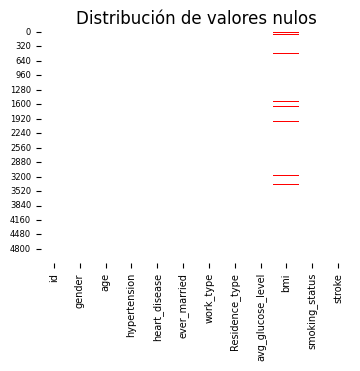

In [ ]:
#Mapa de valores nulos
plt.figure(figsize=(4, 3))
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(["white", "red"]))

#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.title('Distribución de valores nulos')
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=6)
plt.show()

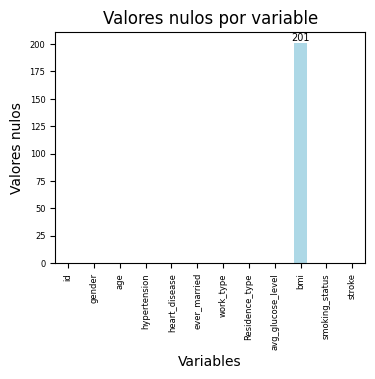

In [ ]:
#Gráfico de barras de los valores nulos
plt.figure(figsize=(4, 3))
nulos=df.isnull().sum().plot(kind='bar', color='lightblue')
plt.xlabel('Variables')
plt.ylabel('Valores nulos')
plt.title('Valores nulos por variable')
plt.xticks(rotation=90)

for barras in nulos.patches:
    #Altura para las anotaciones.
    bar_value = barras.get_height()
    #Separador de miles.
    text = f'{bar_value:,.0f}'
    # Centrar etiquetas
    text_x = barras.get_x() + barras.get_width() / 2

    if bar_value != 0:  #Etiquetas diferentes de cero
      text_y = barras.get_y() + bar_value
      nulos.text(text_x, text_y, text, ha='center', va='bottom', color="black", size=7)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)

plt.show()

Se evidencia que la única columna con datos faltantes es bmi y estos solo representan el 3.93%, al ser una baja cantidad de datos faltantes se puede realizar una imputación de datos simple sin generar redundancia.

In [ ]:
#Se elimina la columna ID ya que no aporta nada a la base de datos por ser datos únicos
df=df.drop(['id'], axis=1)

###Correlación

In [ ]:
#Correlación de las variables numéricas y binarias
correlacion=df.corr()
correlacion

<ipython-input-16-2be9d69ca8b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


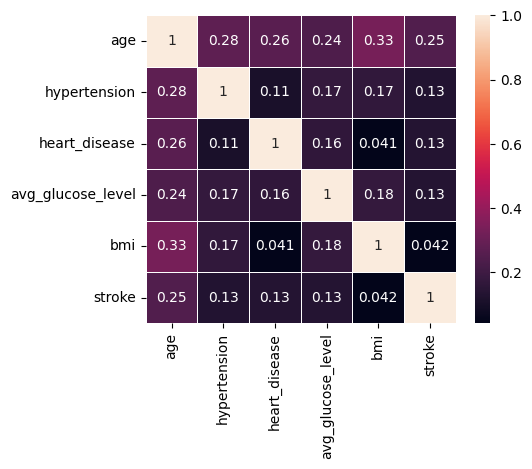

In [ ]:
#Mapa de calor de la matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(correlacion, annot=True, cmap="rocket", linewidths=.5)
plt.show()

Se puede observar que ninguna de estas variables posee una correlación fuerte, es decir que estén por encima de 0.7 en valor absoluto. Ahora entre todas las variables se tiene que age y bmi poseen una correlación baja positiva ya que se encuentran en el umbral de 0.3 a 0.5 en valor absoluto. Esto podría hacer pensar que a mayor edad las personas aumentan su índice de masa corporal, pero en muy baja medida se puede asegurar esto.

###Registros duplicados

In [ ]:
#Verificación de datos duplicados
df.loc[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Se puede evidenciar que no se encuentran registros duplicados.

In [ ]:
#Se crean nuevas variables sin la columna id
variables=df.columns
variables

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#Separamos las variables numéricas del resto del dataset
l=["age",'avg_glucose_level', 'bmi']
grafica=variables.drop(l)
grafica

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

###Distribución de las clases de cada variable

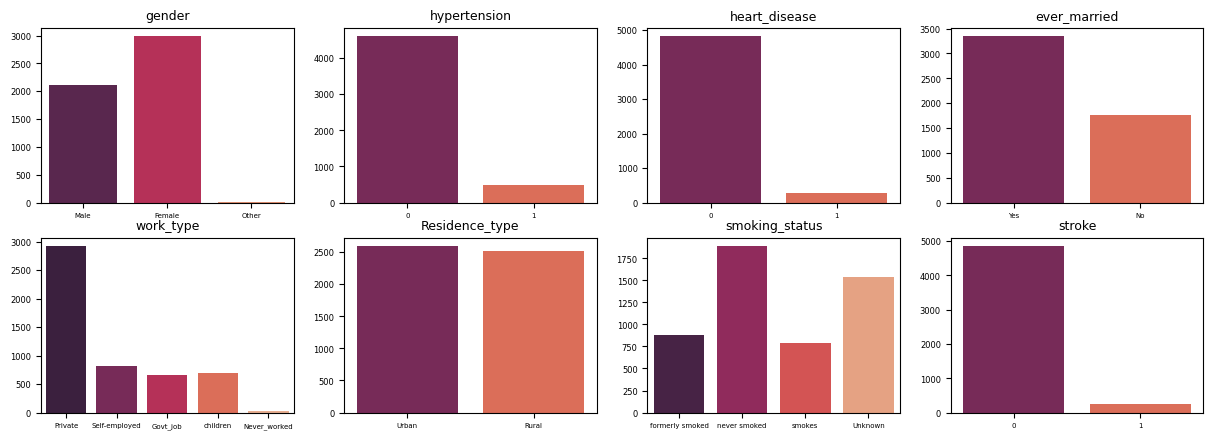

In [ ]:
#Distribución de las variables binarias y categóricas
fig = plt.figure(figsize=(15, 5))


for i in range(len(grafica)):
    #plt.xticks(rotation=45)
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(data=df,x=grafica[i], palette="rocket")
    plt.xlabel("")
    plt.ylabel('')
    plt.title(grafica[i], fontsize=9)

    #for barras in ax.patches:
    # Obtenemos la altura para las anotaciones.
      #bar_value = barras.get_height()
    # Formato de números con separador de miles.
      #text = f'{bar_value:,.0f}'
    # Centrar etiquetas de x-axis.
      #text_x = barras.get_x() + barras.get_width() / 2
    # get_y() lugar donde empieza la barra y añadimos la altura.
      #text_y = barras.get_y() + bar_value
    # Ubicación de las etiquetas de datos de las barras y color
      #ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", size=5)
    plt.tick_params(axis='x', labelsize=5)
    plt.tick_params(axis='y', labelsize=6)

plt.show()

Sobre las variables discretas se tiene que aquellas que son binarias como hypertension, heart_disease y la variable de salida stroke tienen un desbalance muy parecido de sus clases. Acerca de las variables categóricas se ve a work_type muy desbalanceada en su clase Private, de igual manera smoking_status tiene algunas clases desbalanceadas, también se puede decir que entre las variables más balanceadas se encuentran gender, ever_married y Residence_type.

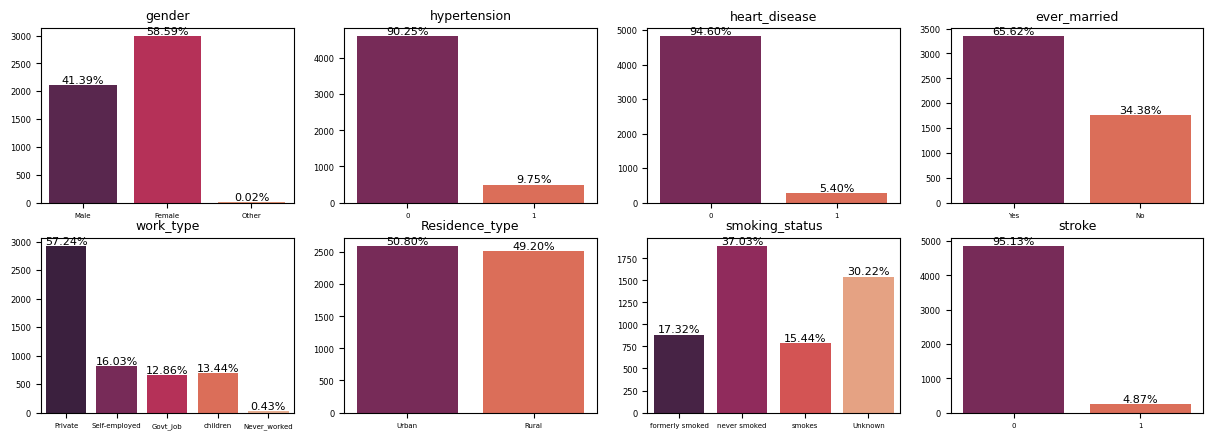

In [ ]:
#Distribución de las variables binarias y categóricas por porcentaje
fig = plt.figure(figsize=(15, 5))


for i in range(len(grafica)):
    #plt.xticks(rotation=45)
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(data=df,x=grafica[i], palette="rocket")
    plt.xlabel("")
    plt.ylabel('')
    plt.title(grafica[i], fontsize=9)
    total_observaciones = len(df[grafica[i]])
    for barras in ax.patches:
        # Obtenemos la altura de la barra
        bar_value = barras.get_height()
        # Calculamos el porcentaje
        porcentaje = (bar_value / total_observaciones) * 100
        # Formateamos el porcentaje con dos decimales y lo convertimos a cadena
        text = f'{porcentaje:.2f}%'
        # Centramos las etiquetas en el eje x
        text_x = barras.get_x() + barras.get_width() / 2
        # Establecemos la ubicación de las etiquetas en el eje y
        text_y = barras.get_y() + bar_value
        # Agregamos las etiquetas al gráfico
        ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", size=8)
        plt.tick_params(axis='x', labelsize=5)
        plt.tick_params(axis='y', labelsize=6)

plt.show()

<ipython-input-24-437240e0ae57>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[l[i]], bins=20, kde=False, palette="rocket")
<ipython-input-24-437240e0ae57>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[l[i]], bins=20, kde=False, palette="rocket")
<ipython-input-24-437240e0ae57>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[l[i]], bins=20, kde=False, palette="rocket")


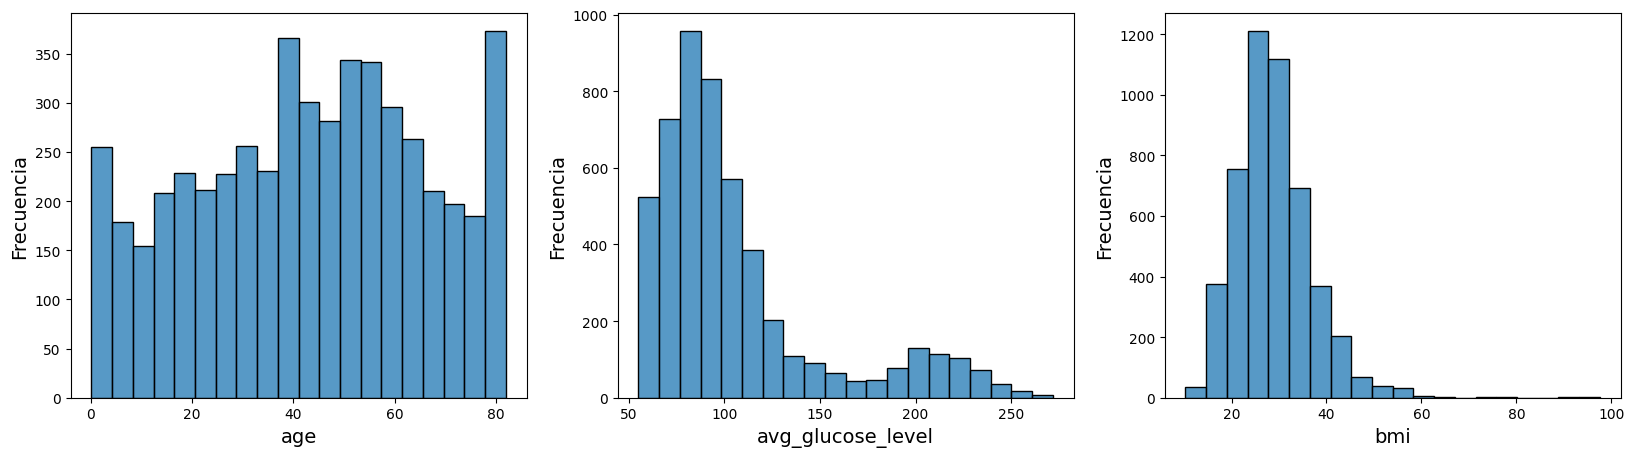

In [ ]:
#Distribución de las variables numéricas
fig = plt.figure(figsize=(20, 5))

for i in range(len(l)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[l[i]], bins=20, kde=False, palette="rocket")
    #plt.title(f'Distribución de {l[i]}', fontsize=18)
    plt.xlabel(l[i], fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)

plt.show()

In [ ]:
#Separamos valores cualitativos y cuantitativos

cuantitativos=[]
cualitativos=[]
for i in variables:
    if type(df[i][0])==str:
        cualitativos.append(i)
    else:
        cuantitativos.append(i)
print(f"Variables cuantitativas: {cuantitativos}")
print(f"Variables cuantitativas: {cualitativos}")

Variables cuantitativas: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Variables cuantitativas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
#Conteo de registros por cada clase
for i in variables:
    print(i.capitalize(), "\n", df[i].value_counts(), "\n", "\n")

Gender 
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 
 

Age 
 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64 
 

Hypertension 
 0    4612
1     498
Name: hypertension, dtype: int64 
 

Heart_disease 
 0    4834
1     276
Name: heart_disease, dtype: int64 
 

Ever_married 
 Yes    3353
No     1757
Name: ever_married, dtype: int64 
 

Work_type 
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 
 

Residence_type 
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 
 

Avg_glucose_level 
 93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64 
 

Bmi 
 28.7    41
28.4    38
26.7    37
27.6    37
26.1 

En general se evidencia una buena calidad de datos en las variables de la base de datos. Si buscamos evidenciar el aporte de cada clase en su variable, se encuentran dos de ellas que aportan muy poco a la base de datos, algo menor al 0.41% de los registros totales de la base de datos. Por un lado, se encuentra Other de la variable gender y por el otro Never_worked de la variable work_type. Para el tratamiento de datos de estas dos clases se elimina la clase Other ya que puede ser poco o nulo lo que puede aportar al modelo y más adelante cuando sea aplicado dummies se estaría reduciendo la dimensionalidad en una variable. En el segundo caso se desea dejar la clase Never_worked para comprobar cómo funciona en primera instancia los modelos con esta clase y luego será eliminada en la iteración cuatro para observar el cambio de las métricas en los modelos de machine learning.

###Eliminación de clases

In [ ]:
#Se elimina la categoría other y never_worked
df=df.drop(df[df["gender"]=="Other"].index[0],axis=0)
df1v= df.index[df["work_type"]=="Never_worked"]
# Eliminar las filas seleccionadas del DataFrame original
df = df.drop(df1v, axis=0)
df


for i in variables:
    print(i.capitalize(), "\n", df[i].value_counts(), "\n", "\n")

Gender 
 Female    2983
Male      2104
Name: gender, dtype: int64 
 

Age 
 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64 
 

Hypertension 
 0    4589
1     498
Name: hypertension, dtype: int64 
 

Heart_disease 
 0    4811
1     276
Name: heart_disease, dtype: int64 
 

Ever_married 
 Yes    3353
No     1734
Name: ever_married, dtype: int64 
 

Work_type 
 Private          2924
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64 
 

Residence_type 
 Urban    2581
Rural    2506
Name: Residence_type, dtype: int64 
 

Avg_glucose_level 
 93.88     6
84.10     5
91.85     5
91.68     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3966, dtype: int64 
 

Bmi 
 28.7    41
27.6    37
26.1    37
26.7    37
27.7    37
        ..
51.8     1
13.4     

In [ ]:
#Se resetea la base de datos ya que se eliminó others de gender
df=df.reset_index()

In [ ]:
# Se reestablecen los indices ya que se eliminaron algunas variables.
df=df.drop("index",axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5082,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5083,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5084,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5085,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Dataframe de los Valores cuantitativos
df_cuantitativos=pd.DataFrame()
for i in cuantitativos:
    df_cuantitativos[i]=df[i]

df_cuantitativos

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5082,80.0,1,0,83.75,NaN,0
5083,81.0,0,0,125.20,40.0,0
5084,35.0,0,0,82.99,30.6,0
5085,51.0,0,0,166.29,25.6,0


In [ ]:
#Dataframe de los valores cualitativos
df_cualitativos=pd.DataFrame()
for i in cualitativos:
    df_cualitativos[i]=df[i]

df_cualitativos

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5082,Female,Yes,Private,Urban,never smoked
5083,Female,Yes,Self-employed,Urban,never smoked
5084,Female,Yes,Self-employed,Rural,never smoked
5085,Male,Yes,Private,Rural,formerly smoked


###Distribución de las clases de las variables contra la variable de salida

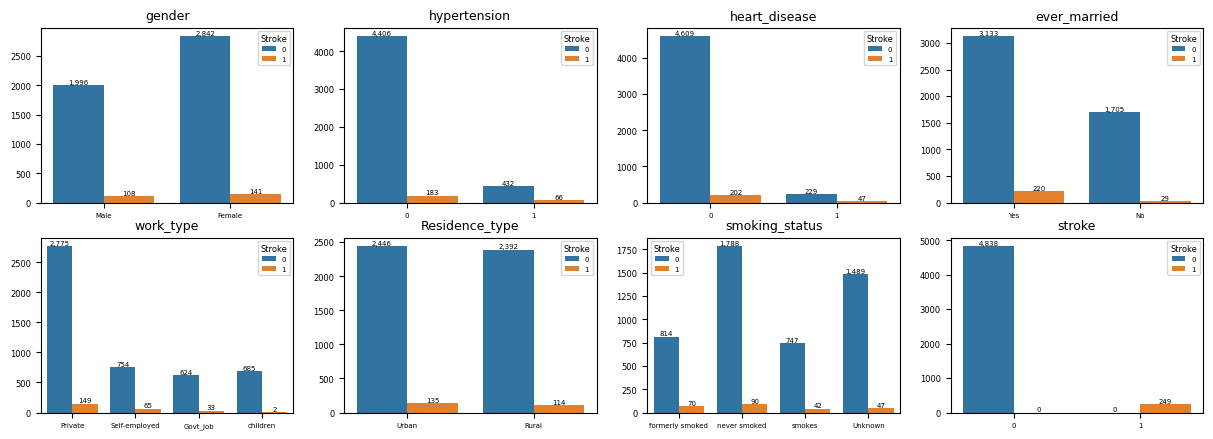

In [ ]:
#Distribución de las variables binarias y categóricas contra variable de salida
fig = plt.figure(figsize=(15, 5))

for i in range(len(grafica)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(data=df, x=grafica[i], hue="stroke")
    plt.xlabel("")
    plt.ylabel('')
    plt.title(grafica[i], fontsize=9)
    for barras in ax.patches:
    # Obtenemos la altura para las anotaciones.
      bar_value = barras.get_height()
    # Formato de números con separador de miles.
      text = f'{bar_value:,.0f}'
    # Centrar etiquetas de x-axis.
      text_x = barras.get_x() + barras.get_width() / 2
    # get_y() lugar donde empieza la barra y añadimos la altura.
      text_y = barras.get_y() + bar_value
    # Ubicación de las etiquetas de datos de las barras y color
      ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", size=5)
    plt.tick_params(axis='x', labelsize=5)
    plt.tick_params(axis='y', labelsize=6)
    legend = ax.legend(title="Stroke", fontsize=5)
    legend.get_title().set_fontsize(6)

plt.show()

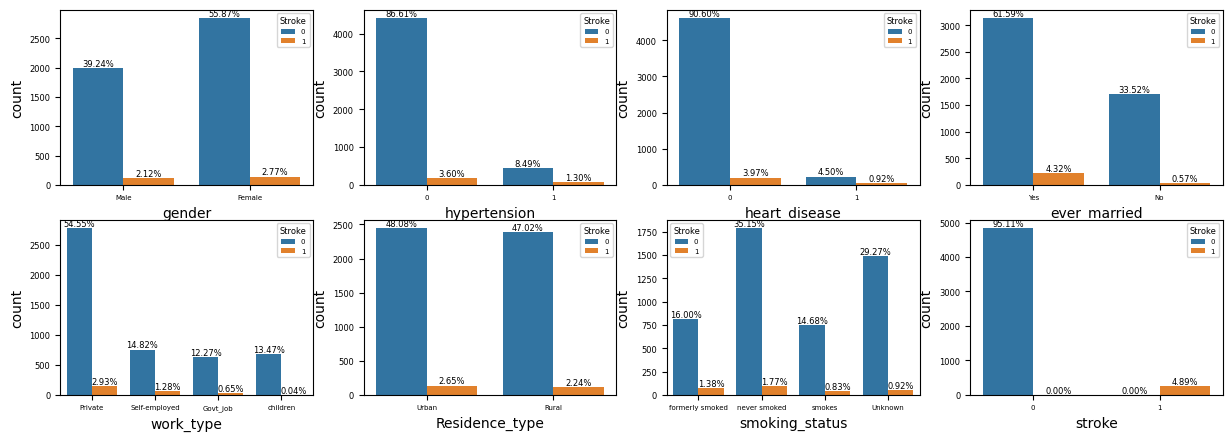

In [ ]:
#Distribución de las variables binarias y categóricas contra variable de salida con porcentaje
fig = plt.figure(figsize=(15, 5))

for i in range(len(grafica)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(data=df, x=grafica[i], hue="stroke")

    #Total de observaciones en cada categoría
    total_observaciones = len(df[grafica[i]])

    for barras in ax.patches:
        bar_value = barras.get_height()
        porcentaje = (bar_value / total_observaciones) * 100
        text = f'{porcentaje:.2f}%'
        text_x = barras.get_x() + barras.get_width() / 2
        text_y = barras.get_y() + bar_value
        ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", size=6)
    plt.tick_params(axis='x', labelsize=5)
    plt.tick_params(axis='y', labelsize=6)
    legend = ax.legend(title="Stroke", fontsize=5)
    legend.get_title().set_fontsize(6)
plt.show()

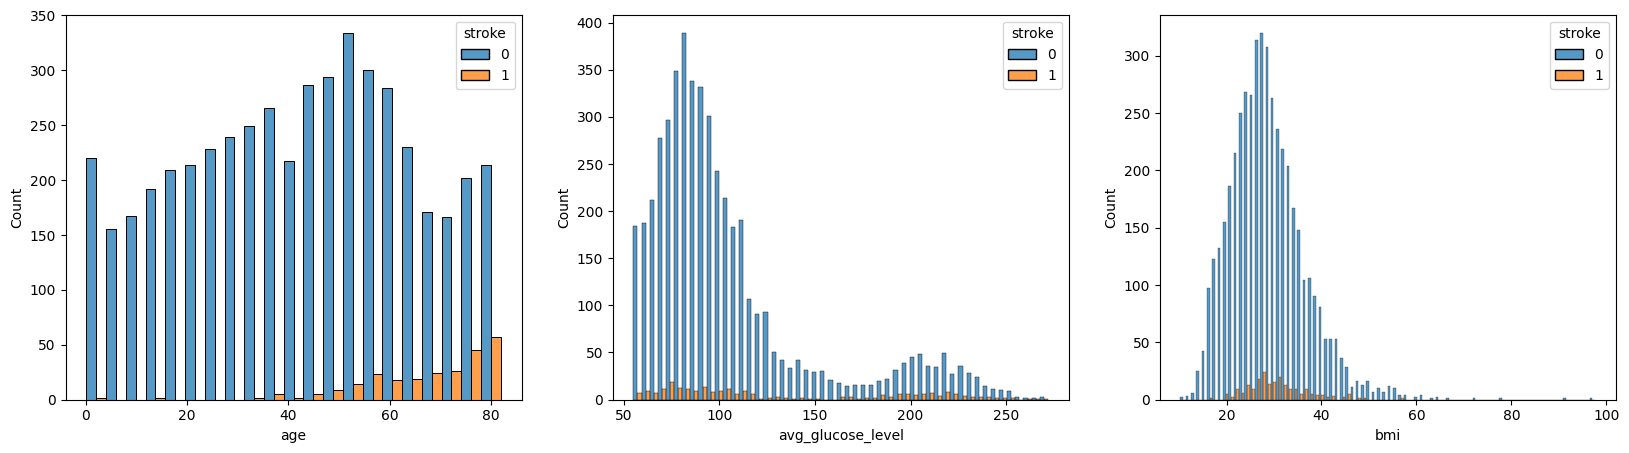

In [ ]:
#Distribución de las variables numéricas contra variable de salida
fig = plt.figure(figsize=(20, 5))

for i in range(len(l)):
    plt.subplot(1, 3, i+1)
    ax = sns.histplot(data=df, x=l[i], hue="stroke", multiple="dodge")


plt.show()

In [ ]:
#Porcentaje de stroke 1 en cada clase
graficasinstroke=grafica.drop('stroke')
graficasinstroke
for i in graficasinstroke:
  clases=list(df[i].unique())
  for j in clases:
    stroke1contraclase=len(df[(df[i] == j) & (df['stroke'] == 1)])/len(df[(df[i] == j) & (df['stroke'] == 0)])*100
    print(f"La variable {i} de la clase {j} tiene un porcentaje de {round(stroke1contraclase,2)}%")

La variable gender de la clase Male tiene un porcentaje de 5.41%
La variable gender de la clase Female tiene un porcentaje de 4.96%
La variable hypertension de la clase 0 tiene un porcentaje de 4.15%
La variable hypertension de la clase 1 tiene un porcentaje de 15.28%
La variable heart_disease de la clase 1 tiene un porcentaje de 20.52%
La variable heart_disease de la clase 0 tiene un porcentaje de 4.38%
La variable ever_married de la clase Yes tiene un porcentaje de 7.02%
La variable ever_married de la clase No tiene un porcentaje de 1.7%
La variable work_type de la clase Private tiene un porcentaje de 5.37%
La variable work_type de la clase Self-employed tiene un porcentaje de 8.62%
La variable work_type de la clase Govt_job tiene un porcentaje de 5.29%
La variable work_type de la clase children tiene un porcentaje de 0.29%
La variable Residence_type de la clase Urban tiene un porcentaje de 5.52%
La variable Residence_type de la clase Rural tiene un porcentaje de 4.77%
La variable sm

###Boxplot numéricas

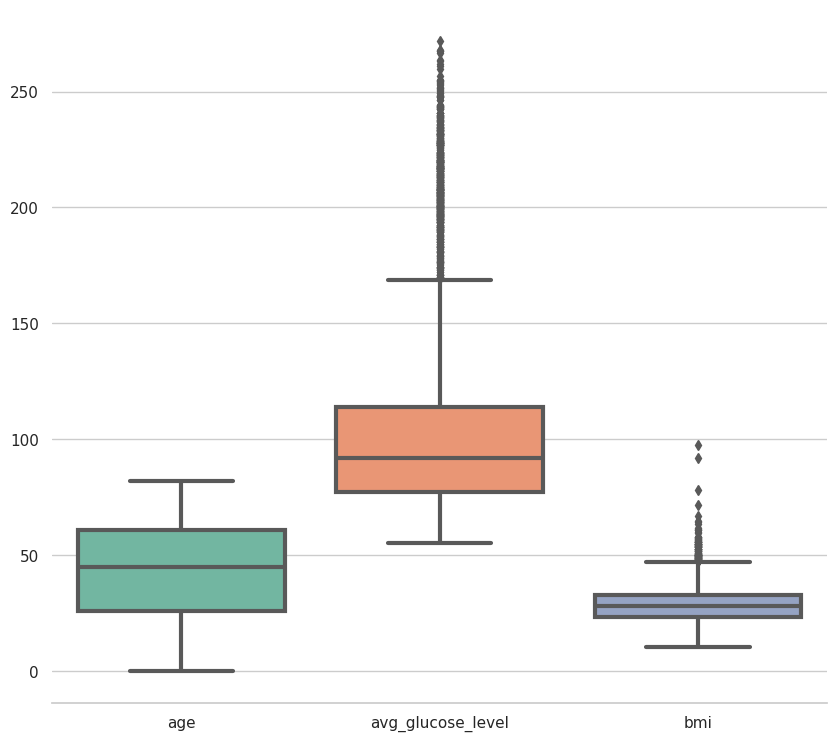

In [ ]:
#Box plot
sns.set(rc={'figure.figsize':(10,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_cuantitativos[l], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

Como las escalas de las diferentes variables son diferentes se pueden presentar distorsiones en el gráfico de los diagramas de cajas, por lo que se decide revisar estos gráficos de forma individual.

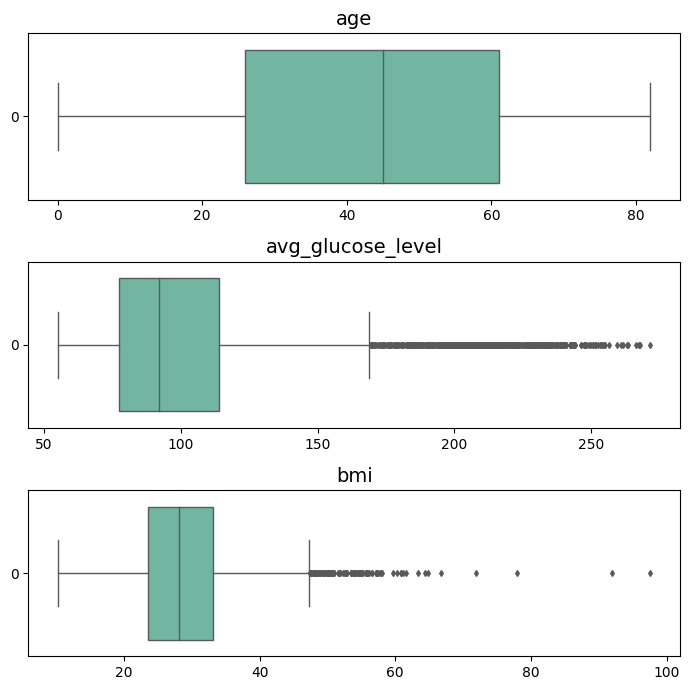

In [ ]:
#Independizamos cada boxplot en su propia escala
plt.style.use('default')
plt.figure(figsize = (7,7))
for i in range (len(l)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(data = df[l[i]], linewidth = 1, palette="Set2", fliersize = 3, orient='h')
    plt.title(l[i], fontsize=14)
    plt.tight_layout()

Se evidencia datos atipicos en la variable avg_glucose_level y en menor medida en bmi.
Se realiza imputación de datos para la variable bmi utilizando la mediana debido a la presencia de datos atipicos.


###Imputación

In [ ]:
#Imputación por la mediana: Otorga valores parecidos a los valores de BMI
imp_2 = SimpleImputer(missing_values = np.nan, strategy= 'median')
imp_2.fit(df_cuantitativos)
Datos_Imputacion_Mediana = imp_2.transform(df_cuantitativos)
nombres = df_cuantitativos.columns
Datos_Imputacion_Mediana = pd.DataFrame(Datos_Imputacion_Mediana, columns = cuantitativos)
display(Datos_Imputacion_Mediana)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.6,1.0
1,61.0,0.0,0.0,202.21,28.1,1.0
2,80.0,0.0,1.0,105.92,32.5,1.0
3,49.0,0.0,0.0,171.23,34.4,1.0
4,79.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...
5082,80.0,1.0,0.0,83.75,28.1,0.0
5083,81.0,0.0,0.0,125.20,40.0,0.0
5084,35.0,0.0,0.0,82.99,30.6,0.0
5085,51.0,0.0,0.0,166.29,25.6,0.0


In [ ]:
#Comprobamos que no quedan datos nulos
Datos_Imputacion_Mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5087 non-null   float64
 1   hypertension       5087 non-null   float64
 2   heart_disease      5087 non-null   float64
 3   avg_glucose_level  5087 non-null   float64
 4   bmi                5087 non-null   float64
 5   stroke             5087 non-null   float64
dtypes: float64(6)
memory usage: 238.6 KB


###Matriz de dispersión

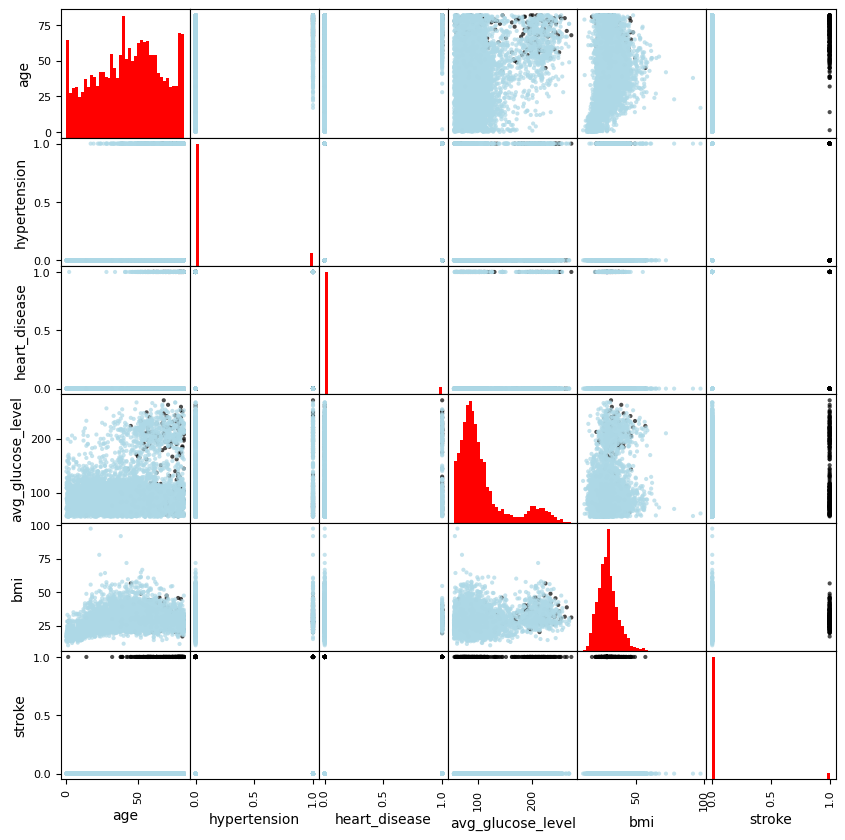

In [ ]:
# Grafica de dispersión e histograma con la variable de salida dibujada
colors = Datos_Imputacion_Mediana['stroke'].map({1: 'black', 0: 'lightblue'})
pd.plotting.scatter_matrix(Datos_Imputacion_Mediana, alpha=0.7, figsize=(10,10), range_padding = 0.1, diagonal='hist',
                           c = colors, hist_kwds = {'bins':40, 'color':'red'})


plt.show()

De igual manera si comparamos matriz de correlación con la matriz de dispersión es posible observar que entre todas las relaciones solo age y bmi son las que visualmente se ven más lineales quitando las variables binarias que son de otra naturaleza. Los puntos negros que se visualizan corresponden a la clase 1 de la variable de la salida, lo que hace notar nuevamente el nivel de desbalanceo de la variable.

In [ ]:
#Separamos variables cuantitativas tanto binarias como las que no interesan
binarias=["hypertension",	"heart_disease",	"stroke"]
num = ["age", "avg_glucose_level", "bmi"]

numm=pd.DataFrame()
for i in num:
    numm=numm.append(Datos_Imputacion_Mediana[i])
numm=numm.T
numm


<ipython-input-43-9d8bdacaaa8d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])
<ipython-input-43-9d8bdacaaa8d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])
<ipython-input-43-9d8bdacaaa8d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numm=numm.append(Datos_Imputacion_Mediana[i])


,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5082,80.0,83.75,28.1
5083,81.0,125.20,40.0
5084,35.0,82.99,30.6
5085,51.0,166.29,25.6


###Normalidad de las variables

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


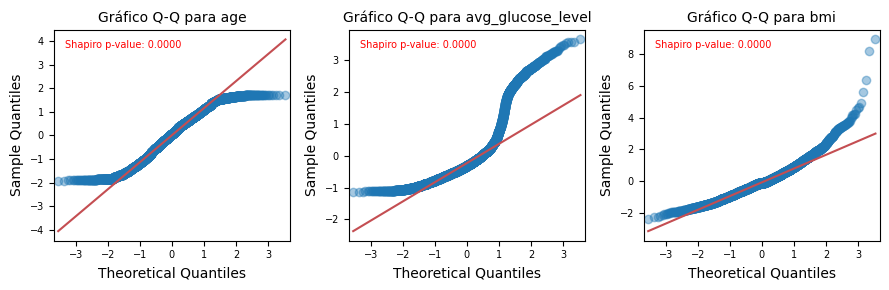

In [ ]:
#Quantil Quantil y test ShapiroWilk
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for i, var_index in enumerate(num):
    sm.qqplot(numm[var_index],fit=True,line='q',alpha=0.4,lw=2,ax=axs[i])  # Selecciona el subplot actual
    axs[i].grid(False)
    axs[i].set_title(f'Gráfico Q-Q para {var_index}', fontsize=10)
    axs[i].tick_params(labelsize=7)

    # Realiza el test de Shapiro
    shapiro_test = stats.shapiro(numm[var_index])

    # Agrega el resultado de la prueba de Shapiro como texto dentro del gráfico
    axs[i].text(0.05, 0.95, f'Shapiro p-value: {shapiro_test[1]:.4f}', transform=axs[i].transAxes,
                ha='left', va='top', fontsize=7, color='red')


plt.tight_layout()
plt.show()

Observando las gráficas de Q-Q por cada variable numérica se puede apreciar que las variables numéricas no siguen una distribución normal ya que los datos no se encuentran por encima de la diagonal en todos sus puntos. Adicional a ello se hizo el test de Shapiro-Wilk para probar las hipótesis:

**H0:** Los datos siguen una distribución normal.

**HA:** Los datos no siguen una distribución normal.

En este caso las tres pruebas dieron un p-valor por debajo de 0.05, rechazando la hipótesis nula y aprobando la alternativa.
Para conocer como cada clase de cada variable estaba asociada a que el paciente habría sufrido un accidente cerebro vascular se calculó con una medida porcentual de cada una de las clases. A continuación, se tienen dos gráficas donde se tienen las variables categóricas, numéricas y binarias.


###Escalamiento

In [ ]:
#Para usar el LOF de forma adecuada los datos deben ser escalados

MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
nombres = numm.columns
imputados_Min_Max = MinMax.fit_transform(numm) # Transformación de los nuevos datos con una escala MinMax
imputados_Min_Max = pd.DataFrame(imputados_Min_Max, columns = num)

imputados_Min_Max

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.203895
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5082,0.975586,0.132167,0.203895
5083,0.987793,0.323516,0.340206
5084,0.426270,0.128658,0.232532
5085,0.621582,0.513203,0.175258


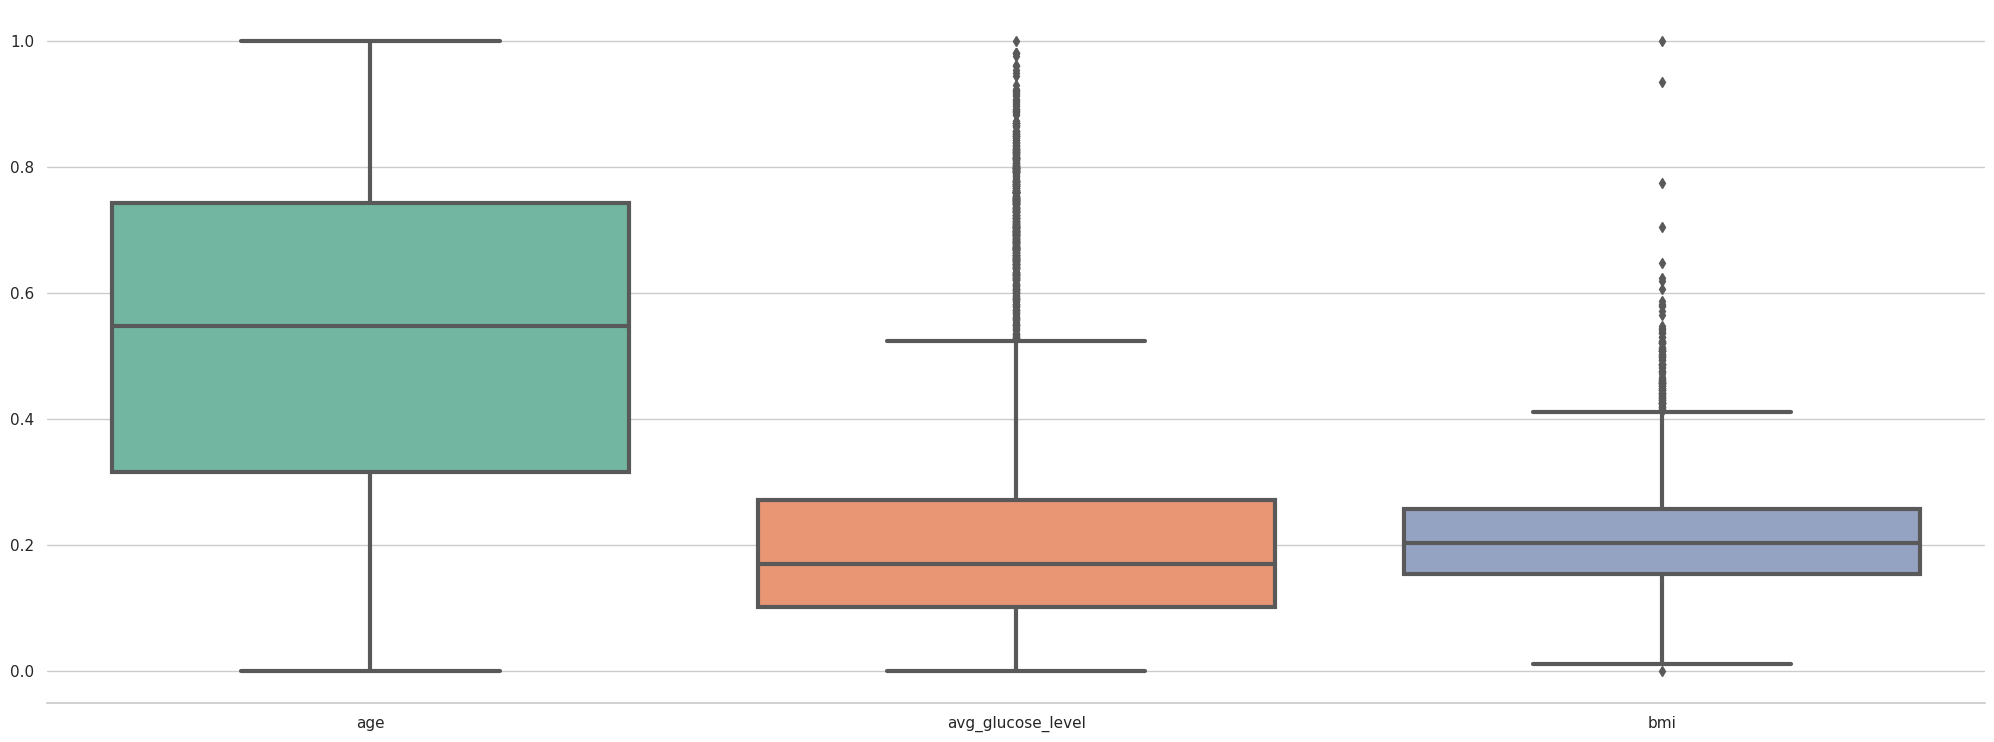

In [ ]:
#Graficamos los datos escalados para observar su distrubución
plt.style.use('default')
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = imputados_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

In [ ]:
#Se hace una revisión de los datos numéricos para comprobar que fueron bien escalados
imputados_Min_Max.describe()

,age,avg_glucose_level,bmi
count,5087.000000,5087.000000,5087.000000
mean,0.528161,0.235731,0.212802
std,0.275778,0.209309,0.088184
min,0.000000,0.000000,0.000000
25%,0.316406,0.102091,0.154639
50%,0.548340,0.169744,0.203895
75%,0.743652,0.272228,0.257732
max,1.000000,1.000000,1.000000


###Eliminación de datos atípicos

**Eliminación de datos atípicos: Método LOF**

In [ ]:
#Se identifican las posiciones de los datos atípicos
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(imputados_Min_Max) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(imputados_Min_Max), dtype = int)
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-0.98954002 -0.97922108 -1.22488312 ... -1.14273497 -0.92009948
 -1.06536116]
Número de muestras o filas con datos atípicos:  57


In [ ]:
#Porcentaje de datos atípicos
porcentajeatipicos= 100*n_errors/numm.shape[0]
print(f"El porcentaje de datos atípicos es de {(round(porcentajeatipicos,3))} %")

El porcentaje de datos atípicos es de 1.121 %


Para la eliminación de datos atípicos se usó LOF (Local Outlier Factor) ya que esta se basa en vecinos cercanos para verificar cuales datos se encuentran por fuera de ese ratio. Logrando así detectar valores que se salen de las densidades de la métrica.
Se encuentran 57 registros atípicos equivalentes a 1.121% de los registros, al ser pocos se eliminan estos datos de la base de datos. Estos datos se retiran de la base de datos original que contiene todas las variables para evitar que se desordenen los registros.

In [ ]:
#Base de datos imputada
df_imp_comp=pd.DataFrame()
for i in cuantitativos:
    df_imp_comp[i]=Datos_Imputacion_Mediana[i]
for i in cualitativos:
    df_imp_comp[i]=df_cualitativos[i]

df_imp_comp=df_imp_comp[variables]
df_imp_comp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5082,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5083,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0.0
5084,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5085,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


In [ ]:
#Se eliminan los datos atípicos
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
df_sin_outliers_LOF = imputados_Min_Max.loc[pos, :]
df_sin_outliers_sin_normalizar = df_imp_comp.loc[pos, :]

print("Número de muestras sin outliers:", df_sin_outliers_LOF.shape[0])
display(df_sin_outliers_sin_normalizar)

Número de muestras sin outliers: 5030


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5081,Female,13.0,0.0,0.0,No,children,Rural,103.08,18.6,Unknown,0.0
5082,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5084,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5085,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


In [ ]:
#Entropía
H_1 = entr(imputados_Min_Max[num])
H_2 = entr(df_sin_outliers_LOF[num])

entropia_normalizada_1 = H_1.sum()/imputados_Min_Max.shape[0]
entropia_normalizada_2 = H_2.sum()/df_sin_outliers_LOF.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

display(Comparacion_entropias)

,Entropia Original,Entropia LOF
age,0.251533,0.252251
avg_glucose_level,0.261867,0.262362
bmi,0.311645,0.312361


Podemos decir que, al tener entropías relativamente cercanas, no han introducido gran cantidad de cambios con respecto en las variables originales. Es decir que LOF logró mantener gran parte de la información original de la base de datos.

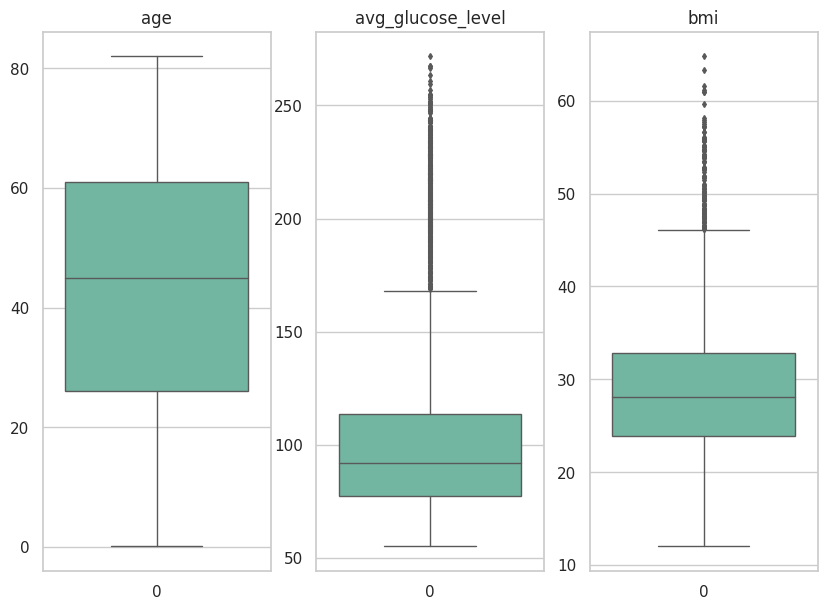

In [ ]:
#Boxplot sin datos atípicos
plt.figure(figsize = (10,7))
for i in range (len(num)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df_sin_outliers_sin_normalizar[num[i]], linewidth = 1, palette="Set2", fliersize = 3)
    plt.title(num[i])

Al revisar nuevamente los gráficos de cajas de las variables cuantitativas no se evidencia gran cambio dado que la cantidad de outliers encontrado fue pequeña, esto se debe a que el método utilizado para detección de outliers fue un método controlado.

In [ ]:
#En busca de calidad en los datos después de eliminar atípicos
for i in num:
    print(i.capitalize(), "\n", df_sin_outliers_sin_normalizar[i].value_counts(), "\n", "\n")

Age 
 78.00    99
57.00    94
52.00    90
54.00    87
51.00    86
         ..
1.40      3
0.48      3
0.40      2
0.08      2
0.16      2
Name: age, Length: 104, dtype: int64 
 

Avg_glucose_level 
 93.88     6
91.85     5
72.49     5
91.68     5
83.16     5
         ..
95.57     1
66.29     1
211.88    1
56.67     1
85.28     1
Name: avg_glucose_level, Length: 3927, dtype: int64 
 

Bmi 
 28.1    228
28.7     40
26.7     37
28.4     37
27.6     37
       ... 
44.1      1
40.6      1
48.2      1
63.3      1
14.9      1
Name: bmi, Length: 404, dtype: int64 
 



In [ ]:
#Información de la base de datos después de los cambios
df_sin_outliers_sin_normalizar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5030 entries, 0 to 5086
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5030 non-null   object 
 1   age                5030 non-null   float64
 2   hypertension       5030 non-null   float64
 3   heart_disease      5030 non-null   float64
 4   ever_married       5030 non-null   object 
 5   work_type          5030 non-null   object 
 6   Residence_type     5030 non-null   object 
 7   avg_glucose_level  5030 non-null   float64
 8   bmi                5030 non-null   float64
 9   smoking_status     5030 non-null   object 
 10  stroke             5030 non-null   float64
dtypes: float64(6), object(5)
memory usage: 600.6+ KB


###Dummies

**Escalar base de datos y crear variables Dummy**

In [ ]:
#Base de datos a trabajar
df_sin_outliers_sin_normalizar

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1.0
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5081,Female,13.0,0.0,0.0,No,children,Rural,103.08,18.6,Unknown,0.0
5082,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.1,never smoked,0.0
5084,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.0
5085,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.6,formerly smoked,0.0


###Variable de salida

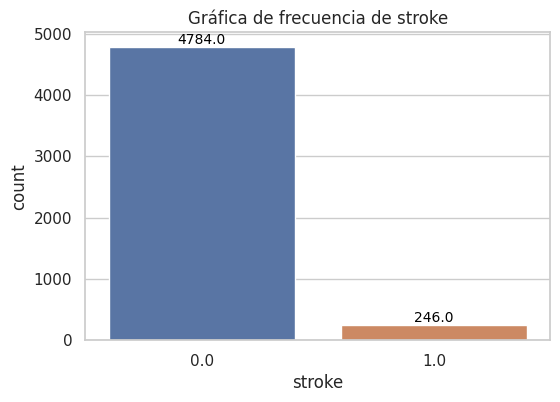

In [ ]:
# Crea la figura para visualizar el desbalance de la variable salida
plt.figure(figsize=(6, 4))
plt.title('Gráfica de frecuencia de stroke')

# Genera el gráfico de conteo
ax = sns.countplot(x=df_sin_outliers_sin_normalizar["stroke"])

# Agrega etiquetas de texto encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
#Escalar Variables

pd.set_option('display.float_format', lambda x: '%.4f' % x)

scaler = MinMaxScaler()

escaladas=df_sin_outliers_sin_normalizar
escaladas[cuantitativos]=scaler.fit_transform(df_sin_outliers_sin_normalizar[cuantitativos])
escaladas

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.8169,0.0000,1.0000,Yes,Private,Urban,0.8013,0.4659,formerly smoked,1.0000
1,Female,0.7437,0.0000,0.0000,Yes,Self-employed,Rural,0.6790,0.3049,never smoked,1.0000
2,Male,0.9756,0.0000,1.0000,Yes,Private,Rural,0.2345,0.3883,never smoked,1.0000
3,Female,0.5972,0.0000,0.0000,Yes,Private,Urban,0.5360,0.4242,smokes,1.0000
4,Female,0.9634,1.0000,0.0000,Yes,Self-employed,Rural,0.5493,0.2273,never smoked,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
5081,Female,0.1577,0.0000,0.0000,No,children,Rural,0.2214,0.1250,Unknown,0.0000
5082,Female,0.9756,1.0000,0.0000,Yes,Private,Urban,0.1322,0.3049,never smoked,0.0000
5084,Female,0.4263,0.0000,0.0000,Yes,Self-employed,Rural,0.1287,0.3523,never smoked,0.0000
5085,Male,0.6216,0.0000,0.0000,Yes,Private,Rural,0.5132,0.2576,formerly smoked,0.0000


In [ ]:
#Revisamos el escalamiento de la base de datos
escaladas.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5030.0000,5030.0000,5030.0000,5030.0000,5030.0000,5030.0000
mean,0.5276,0.0972,0.0547,0.2345,0.3189,0.0489
std,0.2749,0.2963,0.2274,0.2075,0.1405,0.2157
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3164,0.0000,0.0000,0.1024,0.2254,0.0000
50%,0.5483,0.0000,0.0000,0.1696,0.3049,0.0000
75%,0.7437,0.0000,0.0000,0.2708,0.3939,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Al realizar el describe se evidencia un buen escalamiento de los datos dado que en todos los casos el mínimo de la variable es 0 y el máximo es 1.

In [ ]:
#Utilizamos el método one hot encoding para tranformar las variables categóricas a numéricas
data_cat_Dummy = pd.get_dummies(escaladas, drop_first = True) # Codificación simulada. El parámetro drop_first permite sacar las k-1 simulaciones
                                                         # de los niveles categóricos, eliminando el primer nivel de codificación.
display(data_cat_Dummy)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.8169,0.0000,1.0000,0.8013,0.4659,1.0000,1,1,1,0,0,1,1,0,0
1,0.7437,0.0000,0.0000,0.6790,0.3049,1.0000,0,1,0,1,0,0,0,1,0
2,0.9756,0.0000,1.0000,0.2345,0.3883,1.0000,1,1,1,0,0,0,0,1,0
3,0.5972,0.0000,0.0000,0.5360,0.4242,1.0000,0,1,1,0,0,1,0,0,1
4,0.9634,1.0000,0.0000,0.5493,0.2273,1.0000,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,0.1577,0.0000,0.0000,0.2214,0.1250,0.0000,0,0,0,0,1,0,0,0,0
5082,0.9756,1.0000,0.0000,0.1322,0.3049,0.0000,0,1,1,0,0,1,0,1,0
5084,0.4263,0.0000,0.0000,0.1287,0.3523,0.0000,0,1,0,1,0,0,0,1,0
5085,0.6216,0.0000,0.0000,0.5132,0.2576,0.0000,1,1,1,0,0,0,1,0,0


###Correlación dummies

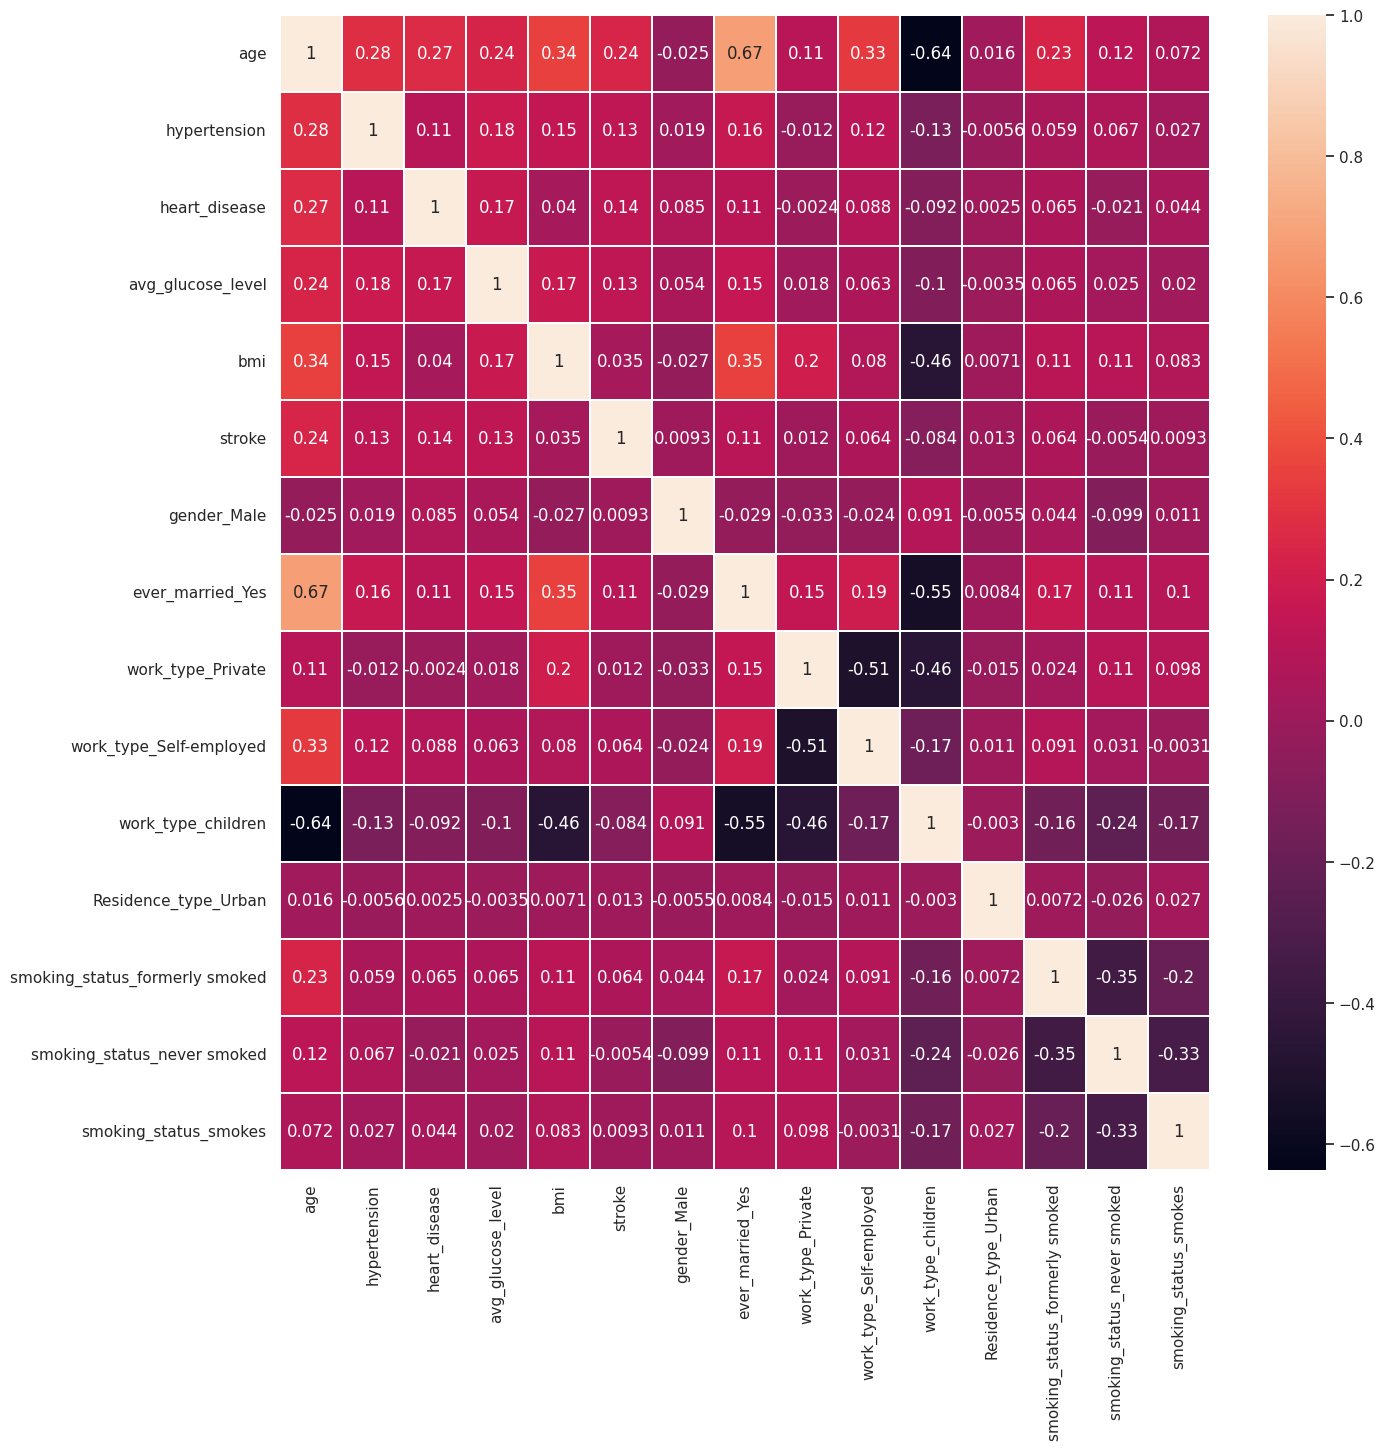

In [ ]:
#Mapa de correlación con variables dummies
correlaciondummy=data_cat_Dummy.corr()

plt.figure(figsize=(15, 15))

# Crea el mapa de calor
sns.heatmap(correlaciondummy, annot=True, cmap="rocket", linewidths=.3)
plt.show()

la matriz de correlación anterior la variable work_type_children posee una correlación negativa de -0.63 contra age por lo cual se descarta esta variable y se obtienen los siguientes resultados con estos cambios

In [ ]:
#Se elimina la columna work_type_children
data_cat_Dummy=data_cat_Dummy.drop(['work_type_children'], axis=1)


#for i in variables:
 #   print(i.capitalize(), "\n", data_cat_Dummy[i].value_counts(), "\n", "\n")

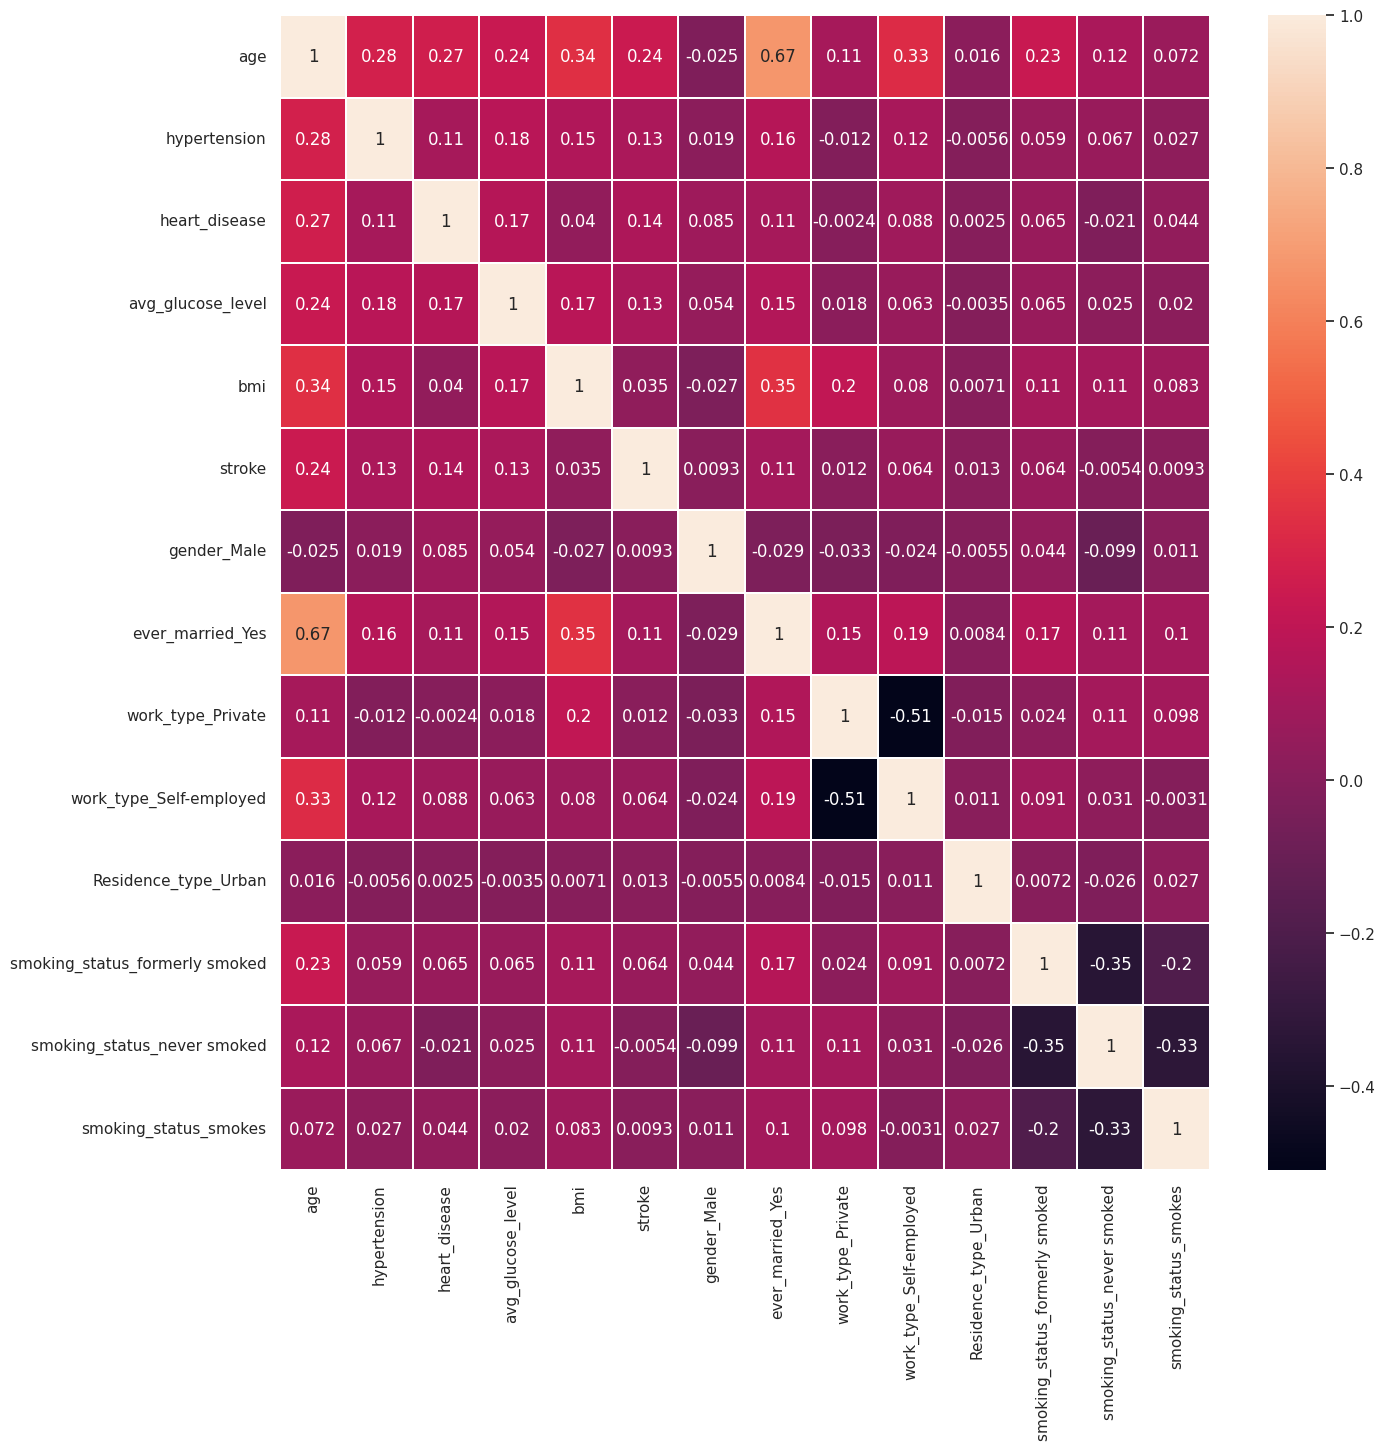

In [ ]:
#Mapa de correlación con variables dummies sin work_type_children
correlaciondummy=data_cat_Dummy.corr()

plt.figure(figsize=(15, 15))

# Crea el mapa de calor
sns.heatmap(correlaciondummy, annot=True, cmap="rocket", linewidths=.3)
plt.show()

###Matriz de dispersión dummies

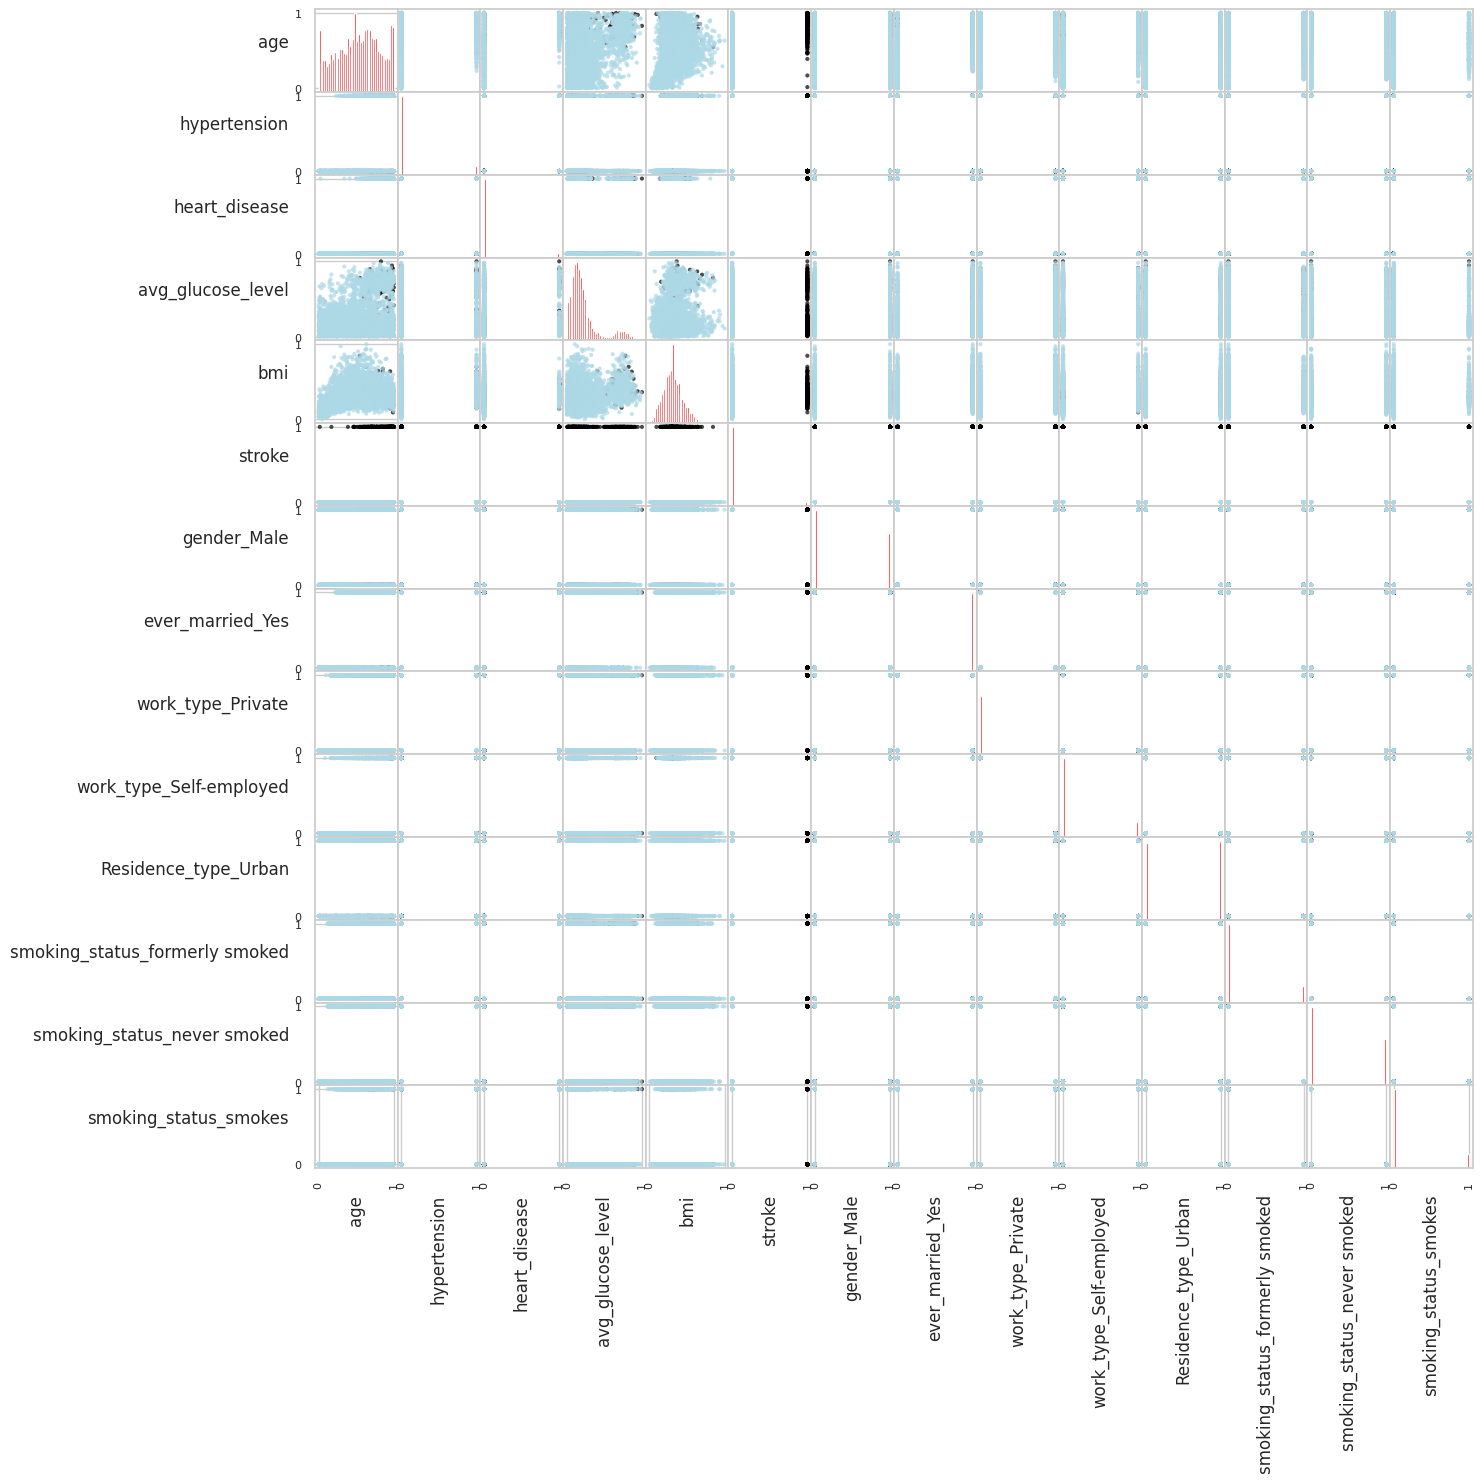

In [ ]:
# Grafica de dispersión e histograma con variables dummies con la variable de salida dibujada
colorsd = data_cat_Dummy['stroke'].map({1: 'black', 0: 'lightblue'})
axesd=pd.plotting.scatter_matrix(data_cat_Dummy, alpha=0.7, figsize=(15,15), range_padding = 0.1, diagonal='hist',
                           c = colorsd, hist_kwds = {'bins':40, 'color':'red'})

for ax in axesd.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

###Separación datos de prueba

**Toma de muestra de 10 datos stroke=1 y 240 datos stroke=0**

Antes de empezar a crear los modelos se extraen dos muestras, una de 10 valores y otra de 240, en la primera se extraen 10 registros donde la variable stroke sea igual a 1 y en la segunda la variable stroke sea igual a 0 con 240 registros. No se extrae una sola muestra totalmente aleatoria ya que dada la distribución de los datos es mucho más probable que se encunentren registros con stroke=0 a registros con stroke=1.

Estas muestras nos permitirán hacer una validación adicional a los modelos creados.

Estas muestras se eliminan de la base de datos para que los modelos no tengan acceso a estos en el momento del entrenamiento y la validación.

In [ ]:
#Sacamos 250 datos de la base de datos para realizar una prueba
muestra_1=data_cat_Dummy[data_cat_Dummy["stroke"]==1].sample(10,random_state = 1234567)
muestra_0=data_cat_Dummy[data_cat_Dummy["stroke"]==0].sample(240,random_state = 1234567)
m=muestra_1.index.tolist()
m.extend(muestra_0.index.tolist())
m

[28,
 56,
 49,
 185,
 216,
 51,
 179,
 140,
 34,
 243,
 3928,
 3486,
 1695,
 3190,
 2739,
 4089,
 1980,
 3720,
 1582,
 2419,
 4236,
 956,
 1594,
 1731,
 4627,
 3587,
 3278,
 2863,
 4915,
 2112,
 697,
 3466,
 929,
 4030,
 583,
 960,
 1610,
 4644,
 1066,
 3507,
 878,
 4286,
 4077,
 1662,
 1650,
 1435,
 4573,
 4964,
 787,
 2804,
 4143,
 1245,
 4150,
 692,
 284,
 2876,
 2035,
 3553,
 1255,
 1648,
 3597,
 1095,
 1350,
 4092,
 2967,
 2827,
 1207,
 4027,
 477,
 3314,
 3478,
 4158,
 716,
 2359,
 2766,
 4911,
 4214,
 3990,
 497,
 599,
 3755,
 2034,
 2891,
 2992,
 1072,
 4696,
 2195,
 2141,
 1225,
 1823,
 307,
 3868,
 2443,
 666,
 3363,
 1214,
 1658,
 4402,
 2859,
 4555,
 885,
 593,
 3537,
 2813,
 382,
 1043,
 1797,
 4888,
 1800,
 791,
 267,
 4247,
 1681,
 2413,
 930,
 1548,
 2776,
 1289,
 2784,
 2273,
 647,
 1413,
 3737,
 1062,
 3502,
 3849,
 3097,
 1297,
 4399,
 1111,
 1999,
 4981,
 1984,
 3252,
 3656,
 4363,
 5057,
 4179,
 2636,
 1038,
 4873,
 2575,
 3523,
 2206,
 3925,
 4114,
 3196,
 4148,
 

In [ ]:
muestra_0

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3928,0.5972,0.0000,0.0000,0.1877,0.2273,0.0000,1,0,1,0,1,0,0,0
3486,0.9878,0.0000,1.0000,0.0607,0.2462,0.0000,1,1,0,1,0,0,0,0
1695,0.0967,0.0000,0.0000,0.1681,0.0265,0.0000,1,0,0,0,0,0,0,0
3190,0.3164,0.0000,0.0000,0.0859,0.2633,0.0000,1,1,0,1,1,0,0,1
2739,0.7192,0.0000,0.0000,0.1612,0.3163,0.0000,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,0.1943,0.0000,0.0000,0.1585,0.3049,0.0000,0,0,1,0,1,0,0,0
1970,0.5117,0.0000,0.0000,0.3195,0.4299,0.0000,0,1,0,1,1,1,0,0
1948,0.1821,0.0000,0.0000,0.1476,0.1193,0.0000,0,0,1,0,0,0,1,0
432,0.8413,0.0000,0.0000,0.7864,0.4716,0.0000,0,1,0,1,0,0,1,0


In [ ]:
muestra_1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
28,0.8413,0.0000,1.0000,0.6468,0.3087,1.0000,1,1,0,1,1,0,0,1
56,1.0000,0.0000,0.0000,0.0194,0.4015,1.0000,0,1,1,0,0,0,1,0
49,0.4751,1.0000,0.0000,0.0137,0.5152,1.0000,0,1,1,0,0,0,0,1
185,0.7681,0.0000,0.0000,0.3794,0.3731,1.0000,1,1,1,0,0,1,0,0
216,0.9512,0.0000,0.0000,0.2815,0.2860,1.0000,1,1,0,1,1,0,1,0
51,0.9512,1.0000,0.0000,0.0933,0.3049,1.0000,1,1,1,0,1,1,0,0
179,0.9878,0.0000,0.0000,0.7298,0.2670,1.0000,1,1,1,0,1,0,0,0
140,1.0000,0.0000,1.0000,0.2242,0.2462,1.0000,1,1,0,0,0,0,1,0
34,0.5850,0.0000,0.0000,0.1342,0.3352,1.0000,1,0,0,0,1,0,1,0
243,0.8291,1.0000,1.0000,0.8881,0.5398,1.0000,0,1,1,0,1,1,0,0


In [ ]:
# Como se eliminaron algunos registros se resetean los indices de la base de datos.
datos_limpios=data_cat_Dummy.drop(m,axis=0).reset_index().drop("index",axis=1)
datos_limpios

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.8169,0.0000,1.0000,0.8013,0.4659,1.0000,1,1,1,0,1,1,0,0
1,0.7437,0.0000,0.0000,0.6790,0.3049,1.0000,0,1,0,1,0,0,1,0
2,0.9756,0.0000,1.0000,0.2345,0.3883,1.0000,1,1,1,0,0,0,1,0
3,0.5972,0.0000,0.0000,0.5360,0.4242,1.0000,0,1,1,0,1,0,0,1
4,0.9634,1.0000,0.0000,0.5493,0.2273,1.0000,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0.1577,0.0000,0.0000,0.2214,0.1250,0.0000,0,0,0,0,0,0,0,0
4776,0.9756,1.0000,0.0000,0.1322,0.3049,0.0000,0,1,1,0,1,0,1,0
4777,0.4263,0.0000,0.0000,0.1287,0.3523,0.0000,0,1,0,1,0,0,1,0
4778,0.6216,0.0000,0.0000,0.5132,0.2576,0.0000,1,1,1,0,0,1,0,0


#Iteraciones

**Balanceo de la variable de salida por SMOTE**

In [ ]:
#Balanceo por SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(datos_limpios.drop('stroke', axis=1), datos_limpios['stroke'])

df1 = pd.DataFrame(X_resampled, columns=datos_limpios.columns.drop('stroke'))
df2 = pd.DataFrame(y_resampled)

df_balanced = pd.concat([df1, df2], axis=1)

In [ ]:
#Se verifica la nueva composición de la base de datos con los datos sintéticos
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9088 non-null   float64
 1   hypertension                    9088 non-null   float64
 2   heart_disease                   9088 non-null   float64
 3   avg_glucose_level               9088 non-null   float64
 4   bmi                             9088 non-null   float64
 5   gender_Male                     9088 non-null   uint8  
 6   ever_married_Yes                9088 non-null   uint8  
 7   work_type_Private               9088 non-null   uint8  
 8   work_type_Self-employed         9088 non-null   uint8  
 9   Residence_type_Urban            9088 non-null   uint8  
 10  smoking_status_formerly smoked  9088 non-null   uint8  
 11  smoking_status_never smoked     9088 non-null   uint8  
 12  smoking_status_smokes           90

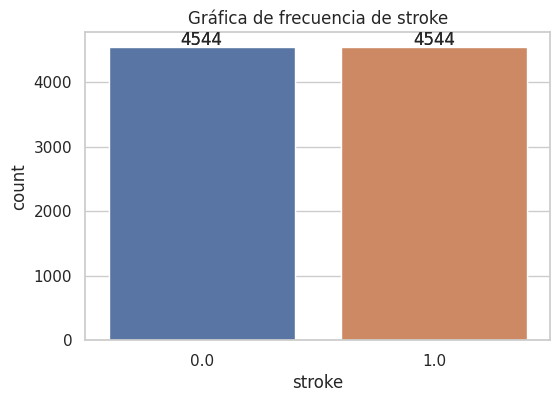

In [ ]:
#Se recrea la imagen nuevamente para ver la variable salida balanceada
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de stroke')
sns.countplot(x=df_balanced['stroke'])
ax=sns.countplot(x=df_balanced['stroke'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

Como se observa en el gráfico anterior la variable stroke ya se encuentra nivelada en sus opciones.

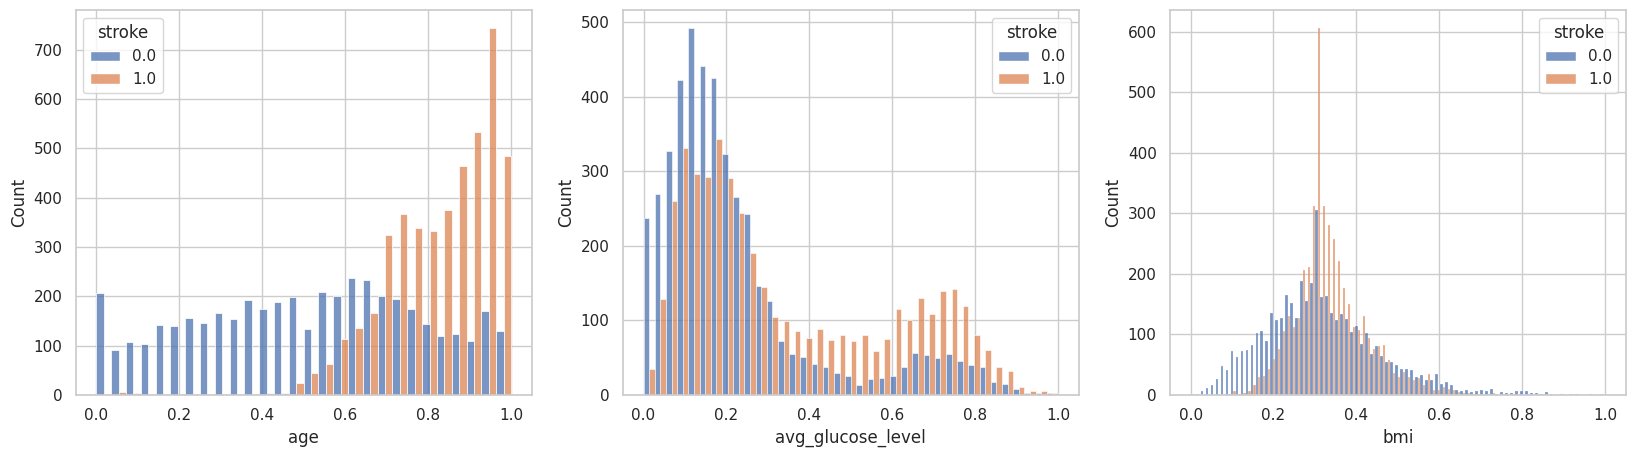

In [ ]:
#Distribución de las variables numéricas contra variable de salida
fig = plt.figure(figsize=(20, 5))

for i in range(len(l)):
    plt.subplot(1, 3, i+1)
    ax = sns.histplot(data=df_balanced, x=l[i], hue="stroke", multiple="dodge")


plt.show()

In [ ]:
#Nueva base de datos escalada, con datos sintéticos y codificada
data_cat_Dummy = pd.get_dummies(df_balanced, drop_first = True)

display(data_cat_Dummy)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.8169,0.0000,1.0000,0.8013,0.4659,1,1,1,0,1,1,0,0,1.0000
1,0.7437,0.0000,0.0000,0.6790,0.3049,0,1,0,1,0,0,1,0,1.0000
2,0.9756,0.0000,1.0000,0.2345,0.3883,1,1,1,0,0,0,1,0,1.0000
3,0.5972,0.0000,0.0000,0.5360,0.4242,0,1,1,0,1,0,0,1,1.0000
4,0.9634,1.0000,0.0000,0.5493,0.2273,0,1,0,1,0,0,1,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9083,0.9777,0.0000,0.0000,0.2086,0.1963,0,1,0,1,0,0,1,0,1.0000
9084,0.7480,0.5535,0.0000,0.8648,0.5066,1,1,1,0,0,0,1,0,1.0000
9085,0.8524,0.0000,1.0000,0.7735,0.3465,0,1,1,0,1,0,0,0,1.0000
9086,0.8226,0.0000,1.0000,0.7908,0.4244,1,1,1,0,1,1,0,0,1.0000


In [ ]:
#Nuevas columnas sin la variable stroke
vDep = list(data_cat_Dummy.columns)
vDep.remove('stroke')
vDep

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Private',
 'work_type_Self-employed',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

Separamos la variable independiente de las variables independientes.

In [ ]:
#La base de datos se parte en dos con las variables de la x y la Y
X = data_cat_Dummy[vDep]
y = data_cat_Dummy['stroke']

In [ ]:
#Composición de las variables independientes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9088 entries, 0 to 9087
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9088 non-null   float64
 1   hypertension                    9088 non-null   float64
 2   heart_disease                   9088 non-null   float64
 3   avg_glucose_level               9088 non-null   float64
 4   bmi                             9088 non-null   float64
 5   gender_Male                     9088 non-null   uint8  
 6   ever_married_Yes                9088 non-null   uint8  
 7   work_type_Private               9088 non-null   uint8  
 8   work_type_Self-employed         9088 non-null   uint8  
 9   Residence_type_Urban            9088 non-null   uint8  
 10  smoking_status_formerly smoked  9088 non-null   uint8  
 11  smoking_status_never smoked     9088 non-null   uint8  
 12  smoking_status_smokes           90

In [ ]:
#Composición de la variable dependiente
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9088 entries, 0 to 9087
Series name: stroke
Non-Null Count  Dtype  
--------------  -----  
9088 non-null   float64
dtypes: float64(1)
memory usage: 71.1 KB


**Separación de datos de entrenamiento y prueba**

In [ ]:
#Separación de variables de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

###Funciones

In [ ]:
#Función de test clase 0
def test_0 (model_0):
  y_model_0= model_0.predict(muestra_0.drop("stroke",axis=1))
  print(y_model_0)
  print(f"y_model_0: {100*y_model_0.tolist().count(0)/muestra_0.shape[0]:.2f}%")

In [ ]:
#Función de test clase 1
def test_1 (model_1):
  y_model_1= model_1.predict(muestra_1.drop("stroke",axis=1))
  print(y_model_1)
  print(f"y_model_1: {100*y_model_1.tolist().count(1)/muestra_1.shape[0]:.2f}%")

In [ ]:
#Rendimiento del conjunto de entrenamiento y validación para medir sobreajuste en f1-score
def entrenamiento_prueba_f1_b (model):
  f1_train = f1_score(y_train, model.predict(X_train))
  f1_test = f1_score(y_test, model.predict(X_test))

  print(f"F1-score en conjunto de entrenamiento: {f1_train:.5f}")
  print(f"F1-score en conjunto de prueba: {f1_test:.5f}")

In [ ]:
#Rendimiento del conjunto de entrenamiento y validación para medir sobreajuste en recall
def entrenamiento_prueba_recall_b (model):
  recall_train = recall_score(y_train, model.predict(X_train))
  recall_test = recall_score(y_test, model.predict(X_test))

  print(f"Recall en conjunto de entrenamiento: {recall_train:.5f}")
  print(f"Recall en conjunto de prueba: {recall_test:.5f}")

##Cuarta iteración: Validación Cruzada

La cuarta iteración se llevará a cabo con la eliminación de dos clases que eran Never_worked de la variable work_type debido a que solo tenía 22 registros de los cuales ninguno correspondía a la clase 1 de la variable de salida y segundo de la matriz de correlación que se generó al aplicar dummies la variable work_type_children posee una correlación negativa de -0.63 contra age por lo cual se descarta esta variable

###Regresión logística

####f1-score

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_gridlr = {
    'C': [0.001, 0.01, 0.1, 1.0, 10],  # Puedes ajustar estos valores
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'class_weight': [None, 'balanced'],
    'multi_class' : ['ovr', 'multinomial']
}

# Crear el modelo base
modelLR_f1 = LogisticRegression(random_state=1)

# Realizar la búsqueda en cuadrícula
modelLR_f1_gs = GridSearchCV(estimator=modelLR_f1, param_grid=param_gridlr, refit=True, cv=5, scoring='f1',verbose=0, return_train_score = True)
modelLR_f1_gs.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = modelLR_f1_gs.best_params_
best_score = modelLR_f1_gs.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación:", best_score)

Mejores hiperparámetros: {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación: 0.8034237256088937


In [ ]:
#modelLR_f1_gs=LogisticRegression(C=0.01, multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l1').fit(X, y)

In [ ]:
#Mejores parámetros
modelLR_f1_gs = modelLR_f1_gs.best_estimator_
modelLR_f1_gs

LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

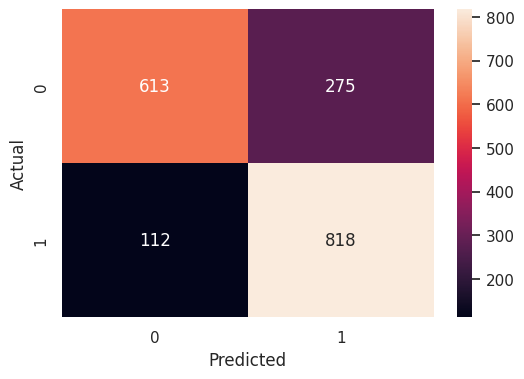

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76       888
         1.0       0.75      0.88      0.81       930

    accuracy                           0.79      1818
   macro avg       0.80      0.78      0.78      1818
weighted avg       0.80      0.79      0.78      1818



In [ ]:
#Creamos matriz de confusión
y_LR_f1_gs = modelLR_f1_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_LR_f1_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_LR_f1_gs))

In [ ]:
test_0 (modelLR_f1_gs)

[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_model_0: 60.83%


In [ ]:
test_1 (modelLR_f1_gs)

[1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
y_model_1: 80.00%


In [ ]:
entrenamiento_prueba_f1_b (modelLR_f1_gs)

F1-score en conjunto de entrenamiento: 0.80366
F1-score en conjunto de prueba: 0.80870


In [ ]:
entrenamiento_prueba_recall_b (modelLR_f1_gs)

Recall en conjunto de entrenamiento: 0.88794
Recall en conjunto de prueba: 0.87957


In [ ]:
# Obtener los coeficientes de regresión
coefficients = modelLR_f1_gs.coef_[0]

# Asociar los coeficientes con las características
feature_names = vDep
coefficients_by_feature = dict(zip(feature_names, coefficients))

sorted_importances = sorted(coefficients_by_feature.items(), key=lambda x: abs(x[1]), reverse=True)

# Mostrar la importancia de características
print("Importancia de características (coeficientes):")
for feature, coef in coefficients_by_feature.items():
    print(f"{feature}: {coef:.3f}")

Importancia de características (coeficientes):
age: 3.783
hypertension: 0.021
heart_disease: 0.000
avg_glucose_level: 0.000
bmi: 0.000
gender_Male: 0.000
ever_married_Yes: 0.000
work_type_Private: 0.000
work_type_Self-employed: 0.000
Residence_type_Urban: 0.000
smoking_status_formerly smoked: 0.000
smoking_status_never smoked: -0.118
smoking_status_smokes: 0.000


####Recall

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_gridlrr = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Puedes ajustar estos valores
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'class_weight': [None, 'balanced'],
    'multi_class' : ['ovr', 'multinomial']
}

# Crear el modelo base
modelLR_r = LogisticRegression(random_state=1)

# Realizar la búsqueda en cuadrícula
modelLR_r_gs = GridSearchCV(modelLR_r, param_grid=param_gridlrr, refit=True, cv=5, scoring='recall',verbose=0, return_train_score = True)
modelLR_r_gs.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = modelLR_r_gs.best_params_
best_score = modelLR_r_gs.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación:", best_score)

Mejores hiperparámetros: {'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntuación: 0.9233537545545453


In [ ]:
#modelLR_3i_r=LogisticRegression(C=0.001, multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l2').fit(X, y)

In [ ]:
#Mejores parámetros
modelLR_r_gs = modelLR_r_gs.best_estimator_
modelLR_r_gs

LogisticRegression(C=0.001, multi_class='ovr', random_state=1,
                   solver='liblinear')

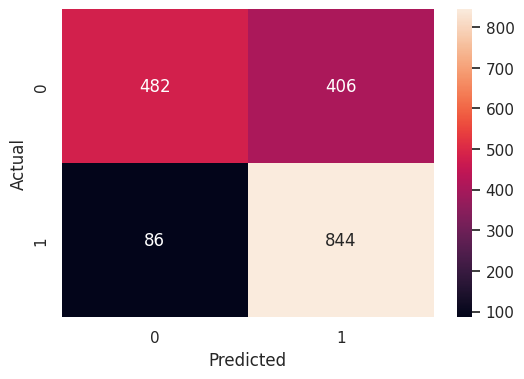

              precision    recall  f1-score   support

         0.0       0.85      0.54      0.66       888
         1.0       0.68      0.91      0.77       930

    accuracy                           0.73      1818
   macro avg       0.76      0.73      0.72      1818
weighted avg       0.76      0.73      0.72      1818



In [ ]:
#Creamos matriz de confusión
y_LR_r_gs=modelLR_r_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_LR_r_gs)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_LR_r_gs))

In [ ]:
test_0 (modelLR_r_gs)

[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.]
y_model_0: 48.33%


In [ ]:
test_1 (modelLR_r_gs)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
y_model_1: 90.00%


In [ ]:
entrenamiento_prueba_f1_b (modelLR_r_gs)

F1-score en conjunto de entrenamiento: 0.76279
F1-score en conjunto de prueba: 0.77431


In [ ]:
entrenamiento_prueba_recall_b (modelLR_r_gs)

Recall en conjunto de entrenamiento: 0.90980
Recall en conjunto de prueba: 0.90753


In [ ]:
# Obtener los coeficientes de regresión
coefficients = modelLR_r_gs.coef_[0]

# Asociar los coeficientes con las características
feature_names = vDep
coefficients_by_feature = dict(zip(feature_names, coefficients))

sorted_importances = sorted(coefficients_by_feature.items(), key=lambda x: abs(x[1]), reverse=True)

# Mostrar la importancia de características
print("Importancia de características (coeficientes):")
for feature, coef in coefficients_by_feature.items():
    print(f"{feature}: {coef:.3f}")

Importancia de características (coeficientes):
age: 0.351
hypertension: 0.175
heart_disease: 0.150
avg_glucose_level: 0.123
bmi: -0.038
gender_Male: -0.108
ever_married_Yes: 0.154
work_type_Private: -0.057
work_type_Self-employed: 0.080
Residence_type_Urban: -0.074
smoking_status_formerly smoked: 0.076
smoking_status_never smoked: -0.095
smoking_status_smokes: -0.043


###Random Forest

####Grid Search basado en out-of-bag score

In [ ]:
param_grid = ParameterGrid(
                {'n_estimators': [100, 150, 200, 250],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                 #'score'     : ['f1', 'recall']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:


    modelRF_oob = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                #scoring      = score,
                random_state = 123,
                ** params
             )

    modelRF_oob.fit(X_train, y_train)


    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelRF_oob.oob_score_)
    print(f"Modelo: {params}")

# Resultados
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 200}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 250}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 100}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 200}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 250}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 100}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150}
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 200}
Modelo: {'criterion':

In [ ]:
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
58,0.9268,entropy,NaN,9,200
51,0.9268,entropy,NaN,5,250
59,0.9265,entropy,NaN,9,250
85,0.9264,entropy,20.0000,5,150
49,0.9260,entropy,NaN,5,150


In [ ]:
#modelRF_oob1=RandomForestClassifier(max_features=5, n_estimators=150, criterion = 'entropy', max_depth = None, random_state = 123).fit(X_train, y_train)

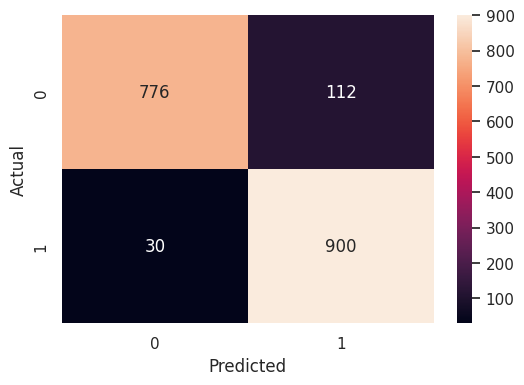

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92       888
         1.0       0.89      0.97      0.93       930

    accuracy                           0.92      1818
   macro avg       0.93      0.92      0.92      1818
weighted avg       0.93      0.92      0.92      1818



In [ ]:
#Creamos matriz de confusión
y_RF_oob=modelRF_oob.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_RF_oob)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_RF_oob))

In [ ]:
test_0 (modelRF_oob)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 85.83%


In [ ]:
test_1 (modelRF_oob)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
y_model_1: 40.00%


In [ ]:
entrenamiento_prueba_f1_b (modelRF_oob)

F1-score en conjunto de entrenamiento: 0.99972
F1-score en conjunto de prueba: 0.92688


In [ ]:
entrenamiento_prueba_recall_b (modelRF_oob)

Recall en conjunto de entrenamiento: 1.00000
Recall en conjunto de prueba: 0.96774


In [ ]:
#Importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelRF_oob.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.4980
3,avg_glucose_level,0.1568
4,bmi,0.1538
1,hypertension,0.0260
5,gender_Male,0.0246
11,smoking_status_never smoked,0.0219
9,Residence_type_Urban,0.0206
6,ever_married_Yes,0.0200
2,heart_disease,0.0199
7,work_type_Private,0.0181


####f1-score: Grid Search basado en validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados
param_grid = {'n_estimators': [100, 150, 200, 250],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
              #'scoring'     : ['f1', 'recall']
             }

# Búsqueda por grid search con validación cruzada
modelRF_f1_gs = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = "f1",
        n_jobs     = - 1,
        refit      = True,
        verbose    = 4,
        return_train_score = True
       )

modelRF_f1_gs.fit(X_train, y_train)

# Resultados
resultados = pd.DataFrame(modelRF_f1_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
59,entropy,None,9,250,0.9248,0.0071,1.0000,0.0000
57,entropy,None,9,150,0.9244,0.0072,1.0000,0.0000
56,entropy,None,9,100,0.9240,0.0079,1.0000,0.0000
58,entropy,None,9,200,0.9235,0.0082,1.0000,0.0000


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelRF_f1_gs.best_params_, ":", modelRF_f1_gs.best_score_, modelRF_f1_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 250} : 0.9248271375333733 f1


In [ ]:
#Mejor estimador
modelRF_f1_gs = modelRF_f1_gs.best_estimator_
modelRF_f1_gs

RandomForestClassifier(criterion='entropy', max_features=9, n_estimators=250,
                       random_state=123)

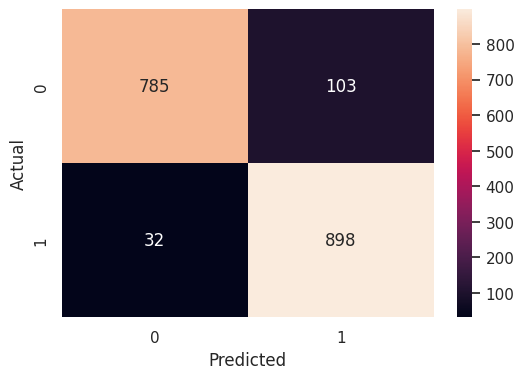

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       888
         1.0       0.90      0.97      0.93       930

    accuracy                           0.93      1818
   macro avg       0.93      0.92      0.93      1818
weighted avg       0.93      0.93      0.93      1818



In [ ]:
#Creamos matriz de confusión
y_RF_f1_gs=modelRF_f1_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_RF_f1_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_RF_f1_gs))

In [ ]:
test_0 (modelRF_f1_gs)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 85.42%


In [ ]:
test_1 (modelRF_f1_gs)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
y_model_1: 40.00%


In [ ]:
entrenamiento_prueba_f1_b (modelRF_f1_gs)

F1-score en conjunto de entrenamiento: 1.00000
F1-score en conjunto de prueba: 0.93009


In [ ]:
entrenamiento_prueba_recall_b (modelRF_f1_gs)

Recall en conjunto de entrenamiento: 1.00000
Recall en conjunto de prueba: 0.96559


In [ ]:
#Importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelRF_f1_gs.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.4883
3,avg_glucose_level,0.1608
4,bmi,0.1567
1,hypertension,0.0263
5,gender_Male,0.0249
11,smoking_status_never smoked,0.0222
9,Residence_type_Urban,0.0218
2,heart_disease,0.0195
6,ever_married_Yes,0.0194
7,work_type_Private,0.0186


####Recall: Grid Search basado en validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados

param_grid = {'n_estimators': [100, 150, 200, 250],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
              #'scoring'     : ['f1', 'recall']
             }

# Búsqueda por grid search con validación cruzada
modelRF_r_gs = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = "recall",
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

modelRF_r_gs.fit(X_train, y_train)

# Resultados
resultados = pd.DataFrame(modelRF_r_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
86,entropy,20,5,200,0.9618,0.0063,1.0000,0.0000
87,entropy,20,5,250,0.9618,0.0059,1.0000,0.0000
84,entropy,20,5,100,0.9613,0.0069,1.0000,0.0000
85,entropy,20,5,150,0.9604,0.0062,1.0000,0.0000


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelRF_r_gs.best_params_, ":", modelRF_r_gs.best_score_, modelRF_r_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 200} : 0.961816530844473 recall


In [ ]:
#Mejor estimador
modelRF_r_gs = modelRF_r_gs.best_estimator_
modelRF_r_gs

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5,
                       n_estimators=200, random_state=123)

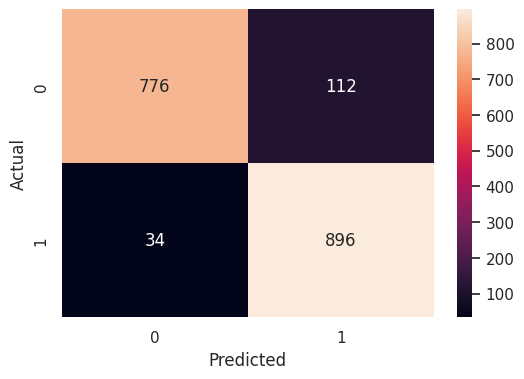

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       888
         1.0       0.89      0.96      0.92       930

    accuracy                           0.92      1818
   macro avg       0.92      0.92      0.92      1818
weighted avg       0.92      0.92      0.92      1818



In [ ]:
#Creamos matriz de confusión
y_RF_r_gs=modelRF_r_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_RF_r_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_RF_r_gs))

In [ ]:
test_0 (modelRF_r_gs)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 87.08%


In [ ]:
test_1 (modelRF_r_gs)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
y_model_1: 30.00%


In [ ]:
entrenamiento_prueba_f1_b (modelRF_r_gs)

F1-score en conjunto de entrenamiento: 0.99972
F1-score en conjunto de prueba: 0.92466


In [ ]:
entrenamiento_prueba_recall_b (modelRF_r_gs)

Recall en conjunto de entrenamiento: 1.00000
Recall en conjunto de prueba: 0.96344


In [ ]:
#Importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelRF_r_gs.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.4181
3,avg_glucose_level,0.1704
4,bmi,0.1694
1,hypertension,0.0400
6,ever_married_Yes,0.0293
2,heart_disease,0.0274
5,gender_Male,0.0267
9,Residence_type_Urban,0.0258
7,work_type_Private,0.0224
11,smoking_status_never smoked,0.0223


###SVM

####f1-score

In [ ]:
# Grid de hiperparámetros evaluados

param_grid = {'C': [0.5, 1, 2, 5, 7],
              'kernel': ['linear', 'rbf'],
              'gamma': [None, 1.0, 5, 10]}

# Búsqueda por grid search con validación cruzada
modelSVM_f1_gs = GridSearchCV(
        estimator  = SVC(random_state = 123, probability=True),
        param_grid = param_grid,
        scoring    = "f1",
        cv         = 5,
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

modelSVM_f1_gs.fit(X_train, y_train)

# Resultados
resultados = pd.DataFrame(modelSVM_f1_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,mean_train_score,std_train_score
39,7,10,rbf,0.9075,0.0028,0.9491,0.0010
31,5,10,rbf,0.9044,0.0030,0.9449,0.0014
37,7,5,rbf,0.8996,0.0049,0.9331,0.0015
23,2,10,rbf,0.8995,0.0039,0.9308,0.0013
29,5,5,rbf,0.8970,0.0042,0.9278,0.0019
15,1,10,rbf,0.8906,0.0047,0.9203,0.0016
21,2,5,rbf,0.8893,0.0054,0.9148,0.0011
35,7,1.0000,rbf,0.8834,0.0085,0.9048,0.0015
7,0.5000,10,rbf,0.8802,0.0036,0.9086,0.0010
13,1,5,rbf,0.8797,0.0051,0.9054,0.0013


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelSVM_f1_gs.best_params_, ":", modelSVM_f1_gs.best_score_, modelSVM_f1_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 7, 'gamma': 10, 'kernel': 'rbf'} : 0.9075331494095895 f1


In [ ]:
#Mejor estimador
modelSVM_f1_gs = modelSVM_f1_gs.best_estimator_
modelSVM_f1_gs

SVC(C=7, gamma=10, probability=True, random_state=123)

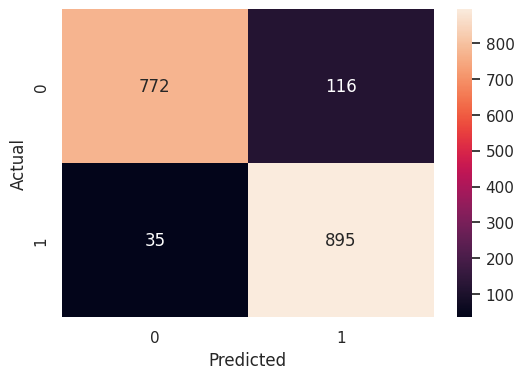

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       888
         1.0       0.89      0.96      0.92       930

    accuracy                           0.92      1818
   macro avg       0.92      0.92      0.92      1818
weighted avg       0.92      0.92      0.92      1818



In [ ]:
#Creamos matriz de confusión
y_SVM_f1_gs=modelSVM_f1_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_SVM_f1_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_SVM_f1_gs))

In [ ]:
test_0 (modelSVM_f1_gs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 84.58%


In [ ]:
test_1 (modelSVM_f1_gs)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_model_1: 10.00%


In [ ]:
entrenamiento_prueba_f1_b (modelSVM_f1_gs)

F1-score en conjunto de entrenamiento: 0.94854
F1-score en conjunto de prueba: 0.92221


In [ ]:
entrenamiento_prueba_recall_b (modelSVM_f1_gs)

Recall en conjunto de entrenamiento: 0.97925
Recall en conjunto de prueba: 0.96237


####recall

In [ ]:
# Grid de hiperparámetros evaluados

param_grid = {'C': [0.5, 1, 2, 5, 7],
              'kernel': ['linear', 'rbf'],
              'gamma': [None, 1.0, 5, 10]}

# Búsqueda por grid search con validación cruzada
modelSVM_r_gs = GridSearchCV(
        estimator  = SVC(random_state = 123, probability=True),
        param_grid = param_grid,
        scoring    = "recall",
        cv         = 5,
        n_jobs     = - 1,
        refit      = True,
        verbose    = 5,
        return_train_score = True
       )

modelSVM_r_gs.fit(X_train, y_train)

# Resultados
resultados = pd.DataFrame(modelSVM_r_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,mean_train_score,std_train_score
39,7,10,rbf,0.9505,0.0090,0.9776,0.0016
31,5,10,rbf,0.9491,0.0095,0.9760,0.0017
37,7,5,rbf,0.9485,0.0126,0.9708,0.0015
23,2,10,rbf,0.9466,0.0114,0.9678,0.0013


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelSVM_r_gs.best_params_, ":", modelSVM_r_gs.best_score_, modelSVM_r_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 7, 'gamma': 10, 'kernel': 'rbf'} : 0.9504703011076503 recall


In [ ]:
#Mejor estimador
modelSVM_r_gs = modelSVM_r_gs.best_estimator_
modelSVM_r_gs

SVC(C=7, gamma=10, probability=True, random_state=123)

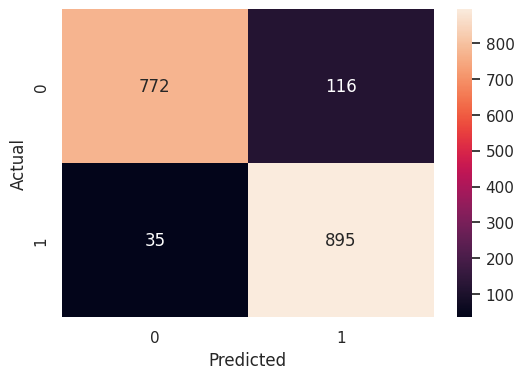

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       888
         1.0       0.89      0.96      0.92       930

    accuracy                           0.92      1818
   macro avg       0.92      0.92      0.92      1818
weighted avg       0.92      0.92      0.92      1818



In [ ]:
#Creamos matriz de confusión
y_SVM_r_gs=modelSVM_r_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_SVM_r_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_SVM_r_gs))

In [ ]:
test_0 (modelSVM_r_gs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 84.58%


In [ ]:
test_1 (modelSVM_r_gs)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_model_1: 10.00%


In [ ]:
entrenamiento_prueba_f1_b (modelSVM_r_gs)

F1-score en conjunto de entrenamiento: 0.94854
F1-score en conjunto de prueba: 0.92221


In [ ]:
entrenamiento_prueba_recall_b (modelSVM_r_gs)

Recall en conjunto de entrenamiento: 0.97925
Recall en conjunto de prueba: 0.96237


####f1-score

In [ ]:
#1 Creacion del modelo
svmP = svm.SVC(kernel='poly', random_state = 123, probability=True)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.5, 1, 5, 7],
                        'degree': [2, 3]}

# Definimos la busqueda mediante 10-fold CV
modelSVM_f1_gs_cd = GridSearchCV(estimator = svmP
                             , param_grid = grid_hiperparametros
                             , cv = 5
                             , scoring = 'f1'
                             , return_train_score = True
                             , refit = True
                             , verbose=0)


modelSVM_f1_gs_cd.fit(X_train, y_train)
# Resultados
resultados = pd.DataFrame(modelSVM_f1_gs_cd.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_C,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,7,3,0.8564,0.0098,0.8740,0.0019
5,5,3,0.8545,0.0103,0.8715,0.0019
3,1,3,0.8446,0.0083,0.8560,0.0036
1,0.5000,3,0.8378,0.0041,0.8483,0.0037


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelSVM_f1_gs_cd.best_params_, ":", modelSVM_f1_gs_cd.best_score_, modelSVM_f1_gs_cd.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 7, 'degree': 3} : 0.8564133026313205 f1


In [ ]:
modelSVM_f1_gs_cd = modelSVM_f1_gs_cd.best_estimator_
modelSVM_f1_gs_cd

SVC(C=7, kernel='poly', probability=True, random_state=123)

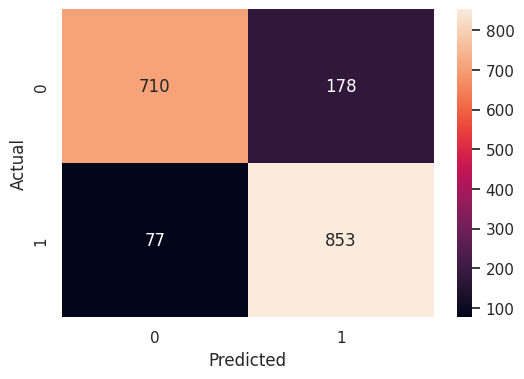

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       888
         1.0       0.83      0.92      0.87       930

    accuracy                           0.86      1818
   macro avg       0.86      0.86      0.86      1818
weighted avg       0.86      0.86      0.86      1818



In [ ]:
#Creamos matriz de confusión
y_SVM_f1_gs_cd=modelSVM_f1_gs_cd.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_SVM_f1_gs_cd)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_SVM_f1_gs_cd))

In [ ]:
test_0 (modelSVM_f1_gs_cd)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_model_0: 77.50%


In [ ]:
test_1 (modelSVM_f1_gs_cd)

[0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
y_model_1: 30.00%


In [ ]:
entrenamiento_prueba_f1_b (modelSVM_f1_gs_cd)

F1-score en conjunto de entrenamiento: 0.87329
F1-score en conjunto de prueba: 0.86996


In [ ]:
entrenamiento_prueba_recall_b (modelSVM_f1_gs_cd)

Recall en conjunto de entrenamiento: 0.91727
Recall en conjunto de prueba: 0.91720


####Recall

In [ ]:
#1 Creacion del modelo
svmP = svm.SVC(kernel='poly', random_state = 123, probability=True)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.5, 1, 5],
                        'degree': [2, 3]}

# Definimos la busqueda mediante 10-fold CV
modelSVM_r_gs_cd = GridSearchCV(estimator = svmP
                             , param_grid = grid_hiperparametros
                             , cv = 5
                             , scoring = 'recall'
                             , return_train_score = True
                             , refit = True
                             , verbose=0)



modelSVM_r_gs_cd.fit(X_train, y_train)
# Resultados
resultados = pd.DataFrame(modelSVM_r_gs_cd.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_C,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
5,5,3,0.9018,0.0128,0.9145,0.0037
3,1,3,0.8913,0.0104,0.9007,0.0044
1,0.5000,3,0.8821,0.0082,0.8928,0.0068
4,5,2,0.8614,0.0109,0.8666,0.0052


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelSVM_r_gs_cd.best_params_, ":", modelSVM_r_gs_cd.best_score_, modelSVM_r_gs_cd.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 5, 'degree': 3} : 0.9017681789098211 recall


In [ ]:
modelSVM_r_gs_cd = modelSVM_r_gs_cd.best_estimator_
modelSVM_r_gs_cd

SVC(C=5, kernel='poly', probability=True, random_state=123)

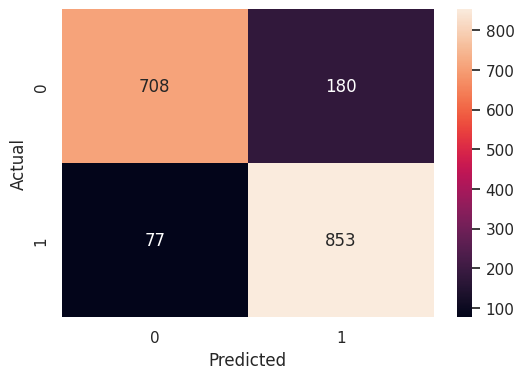

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       888
         1.0       0.83      0.92      0.87       930

    accuracy                           0.86      1818
   macro avg       0.86      0.86      0.86      1818
weighted avg       0.86      0.86      0.86      1818



In [ ]:
#Creamos matriz de confusión
y_SVM_r_gs_cd=modelSVM_r_gs_cd.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_SVM_r_gs_cd)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_SVM_r_gs_cd))

In [ ]:
test_0 (modelSVM_r_gs_cd)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_model_0: 76.67%


In [ ]:
test_1 (modelSVM_r_gs_cd)

[0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
y_model_1: 30.00%


In [ ]:
entrenamiento_prueba_f1_b (modelSVM_r_gs_cd)

F1-score en conjunto de entrenamiento: 0.87270
F1-score en conjunto de prueba: 0.86908


In [ ]:
entrenamiento_prueba_recall_b (modelSVM_r_gs_cd)

Recall en conjunto de entrenamiento: 0.91810
Recall en conjunto de prueba: 0.91720


###KNN

####f1-score

In [ ]:
np.random.seed(4)


# Creacion del modelo
knn = KNeighborsClassifier()


# Definición de parámetros
parameters = {'n_neighbors':[5, 9, 15, 21, 37, 85], 'metric':['euclidean','manhattan','chebyshev']}

# Creacion de gridSearch con los múltiples parámetros
modelknn_f1_gs = GridSearchCV(estimator=knn
                    , param_grid = parameters
                    , scoring='f1'
                    , cv=5
                    , verbose = 0
                    , refit=True
                    , return_train_score=True)


modelknn_f1_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [5, 9, 15, 21, 37, 85]},
             return_train_score=True, scoring='f1')

In [ ]:
# Resultados
resultados = pd.DataFrame(modelknn_f1_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(15)

,param_metric,param_n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
6,manhattan,5,0.8858,0.0015,0.9157,0.0010
0,euclidean,5,0.8826,0.0034,0.9137,0.0015
12,chebyshev,5,0.8730,0.0024,0.9065,0.0018
7,manhattan,9,0.8644,0.0035,0.8884,0.0024
1,euclidean,9,0.8623,0.0046,0.8861,0.0031
8,manhattan,15,0.8531,0.0040,0.8670,0.0010
13,chebyshev,9,0.8518,0.0044,0.8751,0.0022
2,euclidean,15,0.8490,0.0020,0.8645,0.0018
9,manhattan,21,0.8405,0.0034,0.8537,0.0010
14,chebyshev,15,0.8373,0.0047,0.8530,0.0017


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelknn_f1_gs.best_params_, ":", modelknn_f1_gs.best_score_, modelknn_f1_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'metric': 'manhattan', 'n_neighbors': 5} : 0.8857606544785928 f1


In [ ]:
#Mejor estimador
modelknn_f1_gs = modelknn_f1_gs.best_estimator_
modelknn_f1_gs

KNeighborsClassifier(metric='manhattan')

In [ ]:
#modelknnr12=KNeighborsClassifier(n_neighbors=31).fit(X_train, y_train)

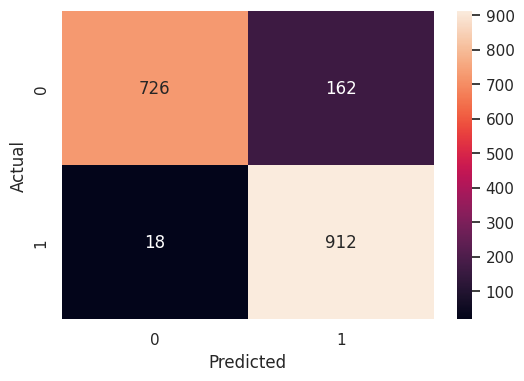

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89       888
         1.0       0.85      0.98      0.91       930

    accuracy                           0.90      1818
   macro avg       0.91      0.90      0.90      1818
weighted avg       0.91      0.90      0.90      1818



In [ ]:
#Creamos matriz de confusión
y_knn_f1_gs=modelknn_f1_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_knn_f1_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_knn_f1_gs))

In [ ]:
test_0 (modelknn_f1_gs)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 79.17%


In [ ]:
test_1 (modelknn_f1_gs)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
y_model_1: 30.00%


In [ ]:
entrenamiento_prueba_f1_b (modelknn_f1_gs)

F1-score en conjunto de entrenamiento: 0.92095
F1-score en conjunto de prueba: 0.91018


In [ ]:
entrenamiento_prueba_recall_b (modelknn_f1_gs)

Recall en conjunto de entrenamiento: 0.98478
Recall en conjunto de prueba: 0.98065


####Recall

In [ ]:
np.random.seed(4)


# Creacion del modelo
knn = KNeighborsClassifier()


# Definición de parámetros
parameters = {'n_neighbors':[5, 9, 15, 21, 37, 85], 'metric':['euclidean','manhattan','chebyshev']}#, 'algorithm': ['auto']}

# Creacion de gridSearch con los múltiples parámetros
modelknn_r_gs = GridSearchCV(estimator=knn
                    , param_grid = parameters
                    , scoring='recall'
                    , cv=5
                    , verbose = 0
                    , refit=True
                    , return_train_score=True)


modelknn_r_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [5, 9, 15, 21, 37, 85]},
             return_train_score=True, scoring='recall')

In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelknn_r_gs.best_params_, ":", modelknn_r_gs.best_score_, modelknn_r_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'metric': 'manhattan', 'n_neighbors': 5} : 0.9665172430968226 recall


In [ ]:
#Mejor estimador
modelknn_r_gs = modelknn_r_gs.best_estimator_
modelknn_r_gs

KNeighborsClassifier(metric='manhattan')

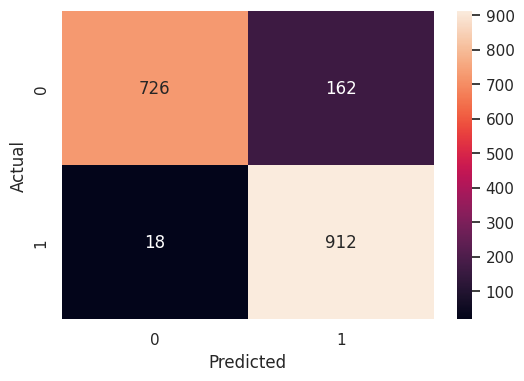

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89       888
         1.0       0.85      0.98      0.91       930

    accuracy                           0.90      1818
   macro avg       0.91      0.90      0.90      1818
weighted avg       0.91      0.90      0.90      1818



In [ ]:
#Creamos matriz de confusión
y_knn_r_gs=modelknn_r_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_knn_r_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_knn_r_gs))

In [ ]:
test_0 (modelknn_r_gs)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 79.17%


In [ ]:
test_1 (modelknn_r_gs)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
y_model_1: 30.00%


In [ ]:
entrenamiento_prueba_f1_b (modelknn_r_gs)

F1-score en conjunto de entrenamiento: 0.92095
F1-score en conjunto de prueba: 0.91018


In [ ]:
entrenamiento_prueba_recall_b (modelknn_r_gs)

Recall en conjunto de entrenamiento: 0.98478
Recall en conjunto de prueba: 0.98065


###DTC

####f1-score

In [ ]:
np.random.seed(4)


# Creacion del modelo
DTC = DecisionTreeClassifier(random_state=123)


# Establecemos un grid con los valores de coste que queremos evaluar
param_gridDTC = {'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
                'max_depth': [3, 5, 10, 20, 30],  # Profundidad máxima del árbol
                'min_samples_split': [2, 5, 10]} # Número mínimo de muestras requeridas para dividir un nodo


# Definimos la busqueda mediante 5-fold CV
modelDTC_f1_gs = GridSearchCV(estimator = DTC
                             , param_grid = param_gridDTC
                             , cv = 5
                             , scoring = 'f1'
                             , return_train_score = True
                             , refit = True
                             , verbose=0)


# Aplicamos la busqueda
modelDTC_f1_gs.fit(X_train, y_train)
# Resultados
resultados = pd.DataFrame(modelDTC_f1_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
27,entropy,30,2,0.8896,0.0135,0.9936,0.0074
28,entropy,30,5,0.8892,0.0162,0.9815,0.0059
29,entropy,30,10,0.8865,0.0161,0.9643,0.0038
24,entropy,20,2,0.8833,0.0107,0.9703,0.0115


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelDTC_f1_gs.best_params_, ":", modelDTC_f1_gs.best_score_, modelDTC_f1_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2} : 0.8896014093438159 f1


In [ ]:
#Mejor estimador
modelDTC_f1_gs = modelDTC_f1_gs.best_estimator_
modelDTC_f1_gs

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=123)

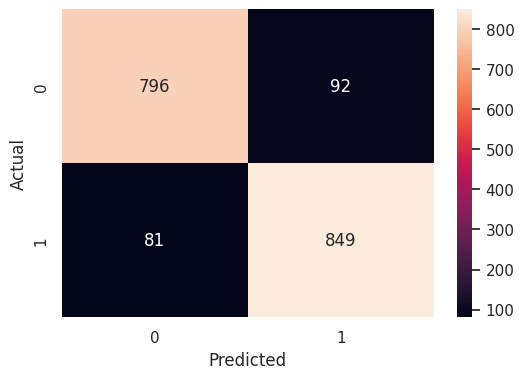

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       888
         1.0       0.90      0.91      0.91       930

    accuracy                           0.90      1818
   macro avg       0.90      0.90      0.90      1818
weighted avg       0.90      0.90      0.90      1818



In [ ]:
#Creamos matriz de confusión
y_DTC_f1_gs=modelDTC_f1_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_DTC_f1_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_DTC_f1_gs))

In [ ]:
test_0 (modelDTC_f1_gs)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 86.67%


In [ ]:
test_1 (modelDTC_f1_gs)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_model_1: 20.00%


In [ ]:
entrenamiento_prueba_f1_b (modelDTC_f1_gs)

F1-score en conjunto de entrenamiento: 1.00000
F1-score en conjunto de prueba: 0.90754


In [ ]:
entrenamiento_prueba_recall_b (modelDTC_f1_gs)

Recall en conjunto de entrenamiento: 1.00000
Recall en conjunto de prueba: 0.91290


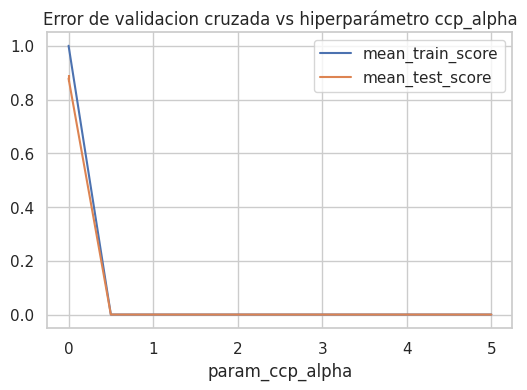

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada

# Valores de ccp_alpha evaluados
param_grid_poda = {'ccp_alpha':np.linspace(0, 5, 11)}

# Búsqueda por validación cruzada
modelDTC_f1_gspoda = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid_poda,
        scoring    = 'f1',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

modelDTC_f1_gspoda.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(modelDTC_f1_gspoda.cv_results_)
#
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Resultados
resultados = pd.DataFrame(modelDTC_f1_gspoda.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(15)

,param_ccp_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0000,0.8782,0.0116,1.0000,0.0000
1,0.5000,0.0000,0.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000
3,1.5000,0.0000,0.0000,0.0000,0.0000
4,2.0000,0.0000,0.0000,0.0000,0.0000
5,2.5000,0.0000,0.0000,0.0000,0.0000
6,3.0000,0.0000,0.0000,0.0000,0.0000
7,3.5000,0.0000,0.0000,0.0000,0.0000
8,4.0000,0.0000,0.0000,0.0000,0.0000
9,4.5000,0.0000,0.0000,0.0000,0.0000


In [ ]:
modelDTC_f1_gspoda.best_params_

{'ccp_alpha': 0.0}

In [ ]:
# Estructura del árbol final
modelDTC_f1_gspoda_final = modelDTC_f1_gspoda.best_estimator_
print(f"Profundidad del árbol: {modelDTC_f1_gspoda_final.get_depth()}")
print(f"Número de nodos terminales: {modelDTC_f1_gspoda_final.get_n_leaves()}")

Profundidad del árbol: 26
Número de nodos terminales: 740


In [ ]:
# Creación del modelo
modelDTC_poda_f1 = DecisionTreeClassifier(
            max_depth         = modelDTC_f1_gspoda_final.get_depth(),
            ccp_alpha         = modelDTC_f1_gspoda.best_params_["ccp_alpha"],
            criterion         = 'entropy',
            min_samples_split = 5,
            random_state      = 123
          )

# Entrenamiento del modelo
modelDTC_poda_f1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_split=5,
                       random_state=123)

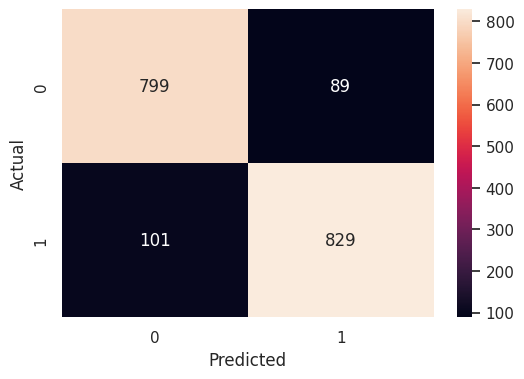

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       888
         1.0       0.90      0.89      0.90       930

    accuracy                           0.90      1818
   macro avg       0.90      0.90      0.90      1818
weighted avg       0.90      0.90      0.90      1818



In [ ]:
#Creamos matriz de confusión
y_DTC_poda_f1=modelDTC_poda_f1.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_DTC_poda_f1)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_DTC_poda_f1))

In [ ]:
test_0 (modelDTC_poda_f1)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 85.83%


In [ ]:
test_1 (modelDTC_poda_f1)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_model_1: 20.00%


In [ ]:
entrenamiento_prueba_f1_b (modelDTC_poda_f1)

F1-score en conjunto de entrenamiento: 0.98438
F1-score en conjunto de prueba: 0.89719


In [ ]:
entrenamiento_prueba_recall_b (modelDTC_poda_f1)

Recall en conjunto de entrenamiento: 0.97676
Recall en conjunto de prueba: 0.89140


In [ ]:
#Importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelDTC_poda_f1.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.5544
3,avg_glucose_level,0.1433
4,bmi,0.1368
11,smoking_status_never smoked,0.0251
5,gender_Male,0.0225
9,Residence_type_Urban,0.0220
2,heart_disease,0.0193
6,ever_married_Yes,0.0157
1,hypertension,0.0155
8,work_type_Self-employed,0.0150


####Recall

In [ ]:
np.random.seed(4)


# Creacion del modelo
DTC = DecisionTreeClassifier(random_state=123)


# Establecemos un grid con los valores de coste que queremos evaluar
param_gridDTC = {'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
                'max_depth': [3, 5, 10, 20, 30],  # Profundidad máxima del árbol
                'min_samples_split': [2, 5, 10]} # Número mínimo de muestras requeridas para dividir un nodo


# Definimos la busqueda mediante 5-fold CV
modelDTC_r_gs = GridSearchCV(estimator = DTC
                             , param_grid = param_gridDTC
                             , cv = 5
                             , scoring = 'recall'
                             , return_train_score = True
                             , refit = True
                             , verbose=0)


modelDTC_r_gs.fit(X_train, y_train)
# Resultados
resultados = pd.DataFrame(modelDTC_r_gs.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
6,gini,10,2,0.9270,0.0158,0.9696,0.0031
7,gini,10,5,0.9245,0.0162,0.9667,0.0038
8,gini,10,10,0.9211,0.0177,0.9588,0.0035
21,entropy,10,2,0.9109,0.0270,0.9424,0.0361


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(modelDTC_r_gs.best_params_, ":", modelDTC_r_gs.best_score_, modelDTC_r_gs.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2} : 0.9269563951372207 recall


In [ ]:
#Mejor estimador
modelDTC_r_gs = modelDTC_r_gs.best_estimator_
modelDTC_r_gs

DecisionTreeClassifier(max_depth=10, random_state=123)

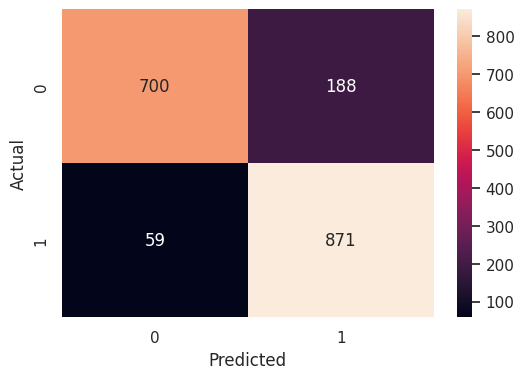

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       888
         1.0       0.82      0.94      0.88       930

    accuracy                           0.86      1818
   macro avg       0.87      0.86      0.86      1818
weighted avg       0.87      0.86      0.86      1818



In [ ]:
#Creamos matriz de confusión
y_DTC_r_gs=modelDTC_r_gs.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_DTC_r_gs)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_DTC_r_gs))

In [ ]:
test_0 (modelDTC_r_gs)

[0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y_model_0: 74.17%


In [ ]:
test_1 (modelDTC_r_gs)

[1. 0. 0. 1. 1. 1. 0. 0. 0. 1.]
y_model_1: 50.00%


In [ ]:
entrenamiento_prueba_f1_b (modelDTC_r_gs)

F1-score en conjunto de entrenamiento: 0.90975
F1-score en conjunto de prueba: 0.87582


In [ ]:
entrenamiento_prueba_recall_b (modelDTC_r_gs)

Recall en conjunto de entrenamiento: 0.96652
Recall en conjunto de prueba: 0.93656


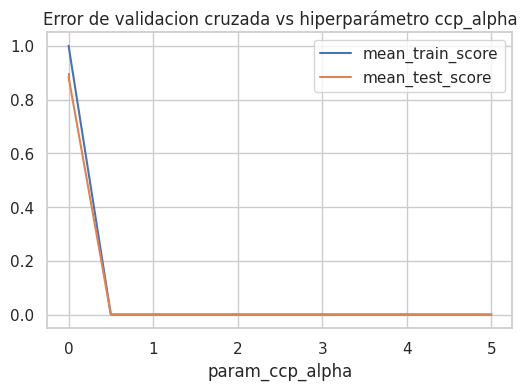

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# Valores de ccp_alpha evaluados
param_grid_poda_r = {'ccp_alpha':np.linspace(0, 5, 11)}

# Búsqueda por validación cruzada
modelDTC_r_gspoda = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid_poda_r,
        scoring    = 'recall',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

modelDTC_r_gspoda.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(modelDTC_r_gspoda.cv_results_)
#
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Resultados
resultados = pd.DataFrame(modelDTC_r_gspoda.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(15)

,param_ccp_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0000,0.8838,0.0144,1.0000,0.0000
1,0.5000,0.0000,0.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000
3,1.5000,0.0000,0.0000,0.0000,0.0000
4,2.0000,0.0000,0.0000,0.0000,0.0000
5,2.5000,0.0000,0.0000,0.0000,0.0000
6,3.0000,0.0000,0.0000,0.0000,0.0000
7,3.5000,0.0000,0.0000,0.0000,0.0000
8,4.0000,0.0000,0.0000,0.0000,0.0000
9,4.5000,0.0000,0.0000,0.0000,0.0000


In [ ]:
modelDTC_r_gspoda.best_params_

{'ccp_alpha': 0.0}

In [ ]:
# Estructura del árbol final
modelDTC_r_gspoda_final = modelDTC_r_gspoda.best_estimator_
print(f"Profundidad del árbol: {modelDTC_r_gspoda_final.get_depth()}")
print(f"Número de nodos terminales: {modelDTC_r_gspoda_final.get_n_leaves()}")

Profundidad del árbol: 26
Número de nodos terminales: 740


In [ ]:
# Creación del modelo
modelDTC_poda_r = DecisionTreeClassifier(
            max_depth         = modelDTC_r_gspoda_final.get_depth(),
            ccp_alpha         = modelDTC_r_gspoda.best_params_["ccp_alpha"],
            criterion         = 'gini',
            min_samples_split = 2,
            random_state      = 123
          )

# Entrenamiento del modelo
modelDTC_poda_r.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=26, random_state=123)

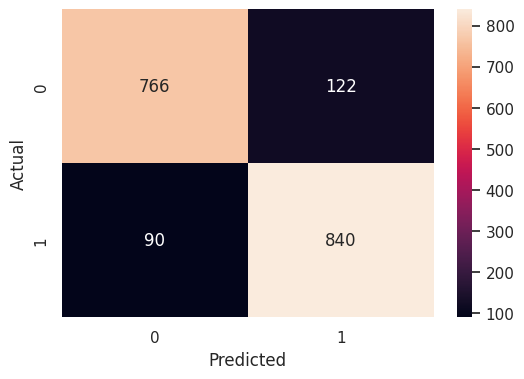

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       888
         1.0       0.87      0.90      0.89       930

    accuracy                           0.88      1818
   macro avg       0.88      0.88      0.88      1818
weighted avg       0.88      0.88      0.88      1818



In [ ]:
#Creamos matriz de confusión
y_DTC_poda_r=modelDTC_poda_r.predict(X_test)

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_DTC_poda_r)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test,y_DTC_poda_r))

In [ ]:
test_0 (modelDTC_poda_r)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_model_0: 82.08%


In [ ]:
test_1 (modelDTC_poda_r)

[1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
y_model_1: 40.00%


In [ ]:
entrenamiento_prueba_f1_b (modelDTC_poda_r)

F1-score en conjunto de entrenamiento: 1.00000
F1-score en conjunto de prueba: 0.88795


In [ ]:
entrenamiento_prueba_recall_b (modelDTC_poda_r)

Recall en conjunto de entrenamiento: 1.00000
Recall en conjunto de prueba: 0.90323


In [ ]:
#Importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelDTC_poda_r.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.5684
4,bmi,0.1350
3,avg_glucose_level,0.1287
11,smoking_status_never smoked,0.0228
1,hypertension,0.0213
5,gender_Male,0.0210
9,Residence_type_Urban,0.0208
8,work_type_Self-employed,0.0167
2,heart_disease,0.0159
7,work_type_Private,0.0129


###Curva ROC-AUC

0.84: LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')
0.98: RandomForestClassifier(criterion='entropy', max_features=5, random_state=123)
0.96: SVC(C=7, gamma=10, probability=True, random_state=123)
0.92: SVC(C=7, kernel='poly', probability=True, random_state=123)
0.95: KNeighborsClassifier(metric='manhattan')
0.89: DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_split=5,
                       random_state=123)


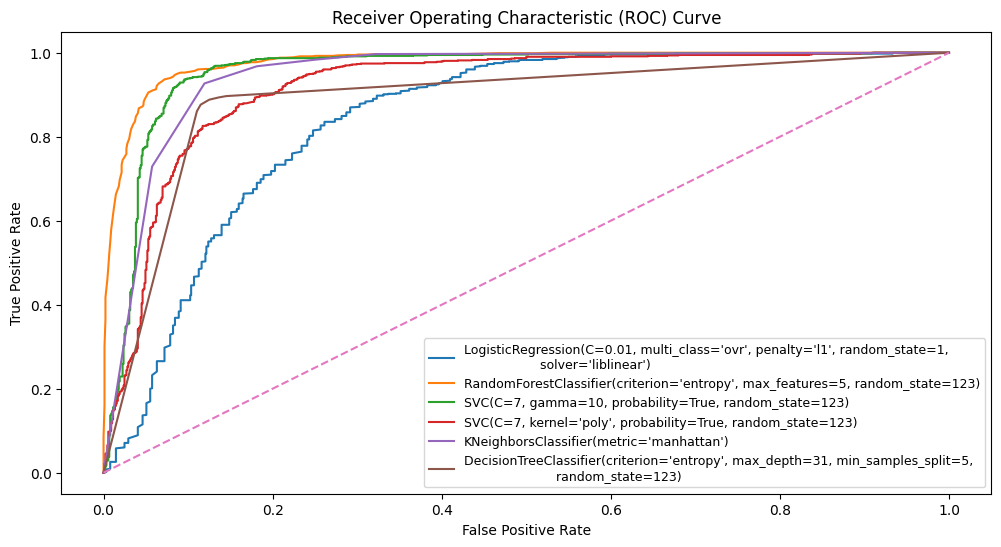

In [ ]:
#Se crea la curva ROC
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos_f1_3i = [modelLR_f1_gs, modelRF_f1_gs, modelSVM_f1_gs, modelSVM_f1_gs_cd, modelknn_f1_gs, modelDTC_poda_f1]

# Iterar sobre los modelos
for i in range(len(Modelos_f1_3i)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos_f1_3i[i].predict_proba(X_test)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos_f1_3i[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos_f1_3i[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.legend(fontsize=9)  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

0.84: LogisticRegression(C=0.001, multi_class='ovr', random_state=1,
                   solver='liblinear')
0.98: RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5,
                       n_estimators=250, random_state=123)
0.96: SVC(C=7, gamma=10, probability=True, random_state=123)
0.92: SVC(C=5, kernel='poly', probability=True, random_state=123)
0.95: KNeighborsClassifier(metric='manhattan')
0.89: DecisionTreeClassifier(max_depth=31, random_state=123)


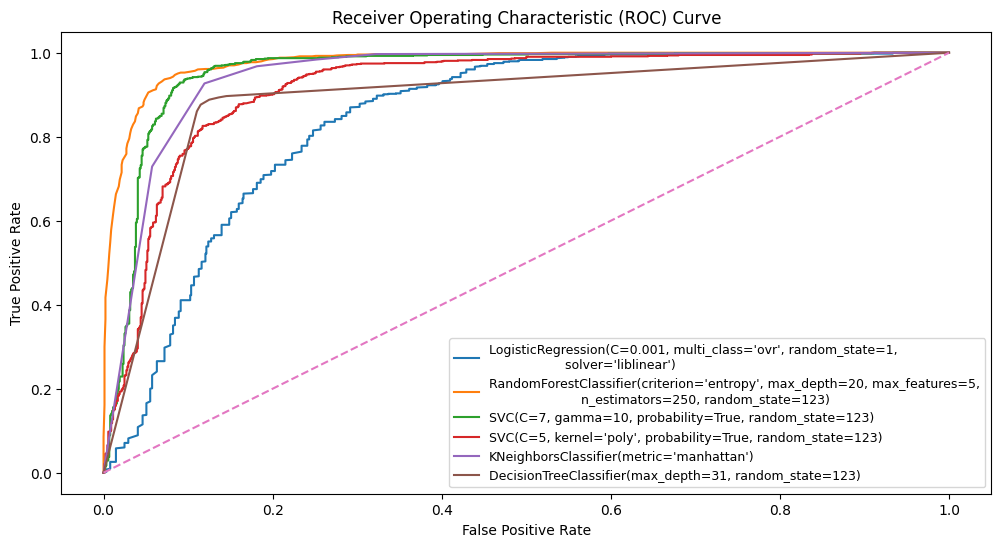

In [ ]:
#Se crea la curva ROC
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos_r_3i = [modelLR_r_gs, modelRF_r_gs, modelSVM_r_gs, modelSVM_r_gs_cd, modelknn_r_gs, modelDTC_poda_r]

# Iterar sobre los modelos
for i in range(len(Modelos_r_3i)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos_f1_3i[i].predict_proba(X_test)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos_r_3i[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos_r_3i[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.legend(fontsize=9)  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

###Validación Cruzada

####f1-score

In [ ]:
# definicion de la variable con el número de pliegues
CV = 5

# Lista con las métricas de scoring
#scoring = ['accuracy', 'precision', 'recall', 'f1']
scoring = ['recall', 'f1']
# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR', modelLR_f1_gs),
    ('modelRanForest', modelRF_f1_gs),
    ('modelSVC1', modelSVM_f1_gs),
    ('modelSVC', modelSVM_f1_gs_cd),
    ('modelknn', modelknn_f1_gs),
    ('modelTreeClas', modelDTC_poda_f1)

]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_train, y_train, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name','test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_recall,test_f1
0,modelLR,0.8850,0.7908
1,modelLR,0.8907,0.7975
2,modelLR,0.9046,0.8134
3,modelLR,0.8963,0.8080
4,modelLR,0.8935,0.8035
5,modelRanForest,0.9695,0.9321
6,modelRanForest,0.9571,0.9251
7,modelRanForest,0.9627,0.9249
8,modelRanForest,0.9544,0.9218
9,modelRanForest,0.9585,0.9191


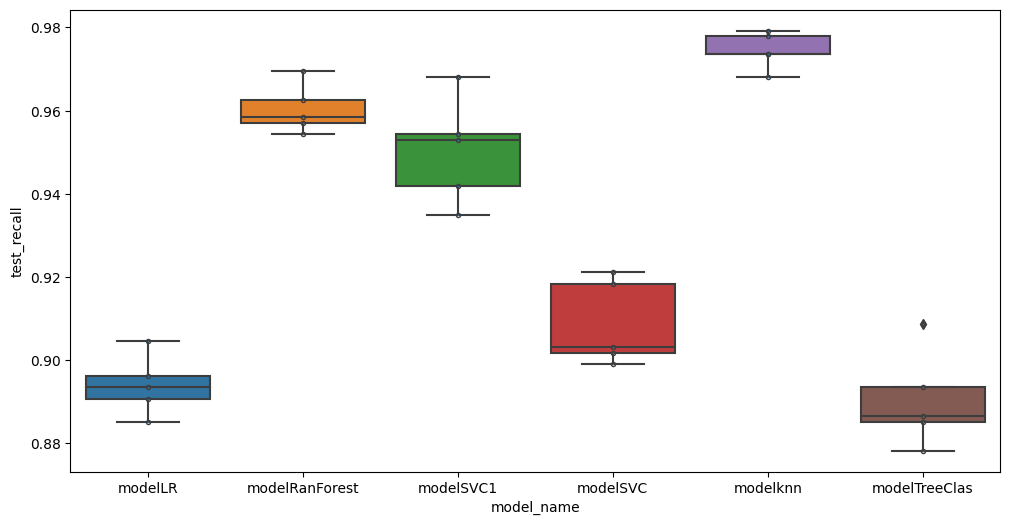

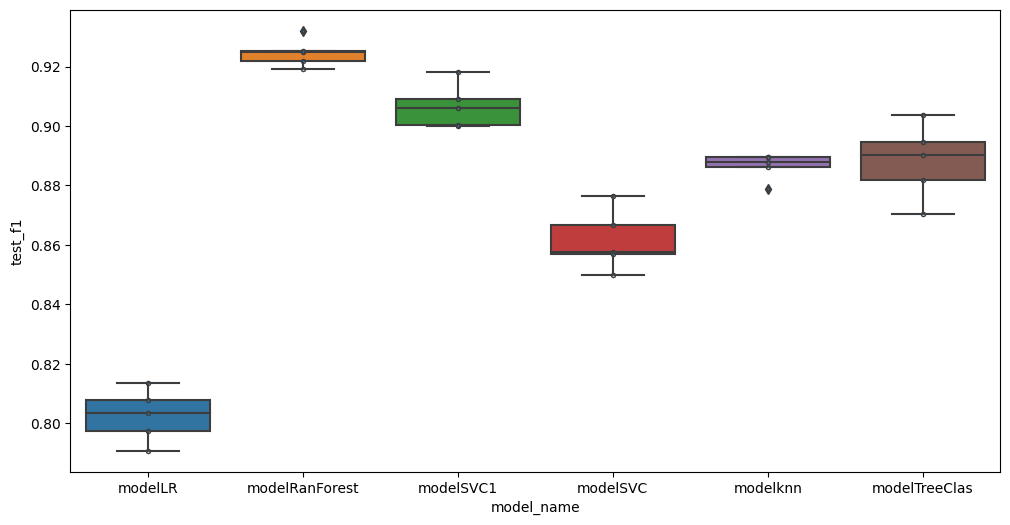

In [ ]:
# Gráfica de las métricas de los modelos

for j in cv_df.columns[1:]:

    fig = plt.figure(figsize=(12,6))

    sns.boxplot(x='model_name', y=j, data=cv_df)
    sns.stripplot(x='model_name', y=j, data=cv_df,
                  size=1, jitter=False, edgecolor="gray", linewidth=3)
    plt.show()

In [ ]:
#La media de cada métrica por modelo
for j in cv_df.columns[1:]:
    print(f"\n{j} \n")
    print(cv_df.groupby('model_name')[j].mean().sort_values(ascending=False))


test_recall 

model_name
modelknn         0.9745
modelRanForest   0.9604
modelSVC1        0.9505
modelSVC         0.9087
modelLR          0.8940
modelTreeClas    0.8904
Name: test_recall, dtype: float64

test_f1 

model_name
modelRanForest   0.9246
modelSVC1        0.9067
modelTreeClas    0.8882
modelknn         0.8864
modelSVC         0.8615
modelLR          0.8027
Name: test_f1, dtype: float64


####Recall

In [ ]:
# definicion de la variable con el número de pliegues
CV = 5

# Lista con las métricas de scoring
scoring = ['recall', 'f1']
# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR', modelLR_r_gs),
    ('modelRanForest', modelRF_r_gs),
    ('modelSVC1', modelSVM_r_gs),
    ('modelSVC', modelSVM_r_gs_cd),
    ('modelknn', modelknn_r_gs),
    ('modelTreeClas', modelDTC_poda_r)

]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_train, y_train, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name','test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_recall,test_f1
0,modelLR,0.8767,0.7331
1,modelLR,0.9129,0.7551
2,modelLR,0.9059,0.7533
3,modelLR,0.9267,0.7627
4,modelLR,0.9142,0.7593
5,modelRanForest,0.9765,0.9295
6,modelRanForest,0.9613,0.9279
7,modelRanForest,0.9640,0.9213
8,modelRanForest,0.9599,0.9229
9,modelRanForest,0.9613,0.9151


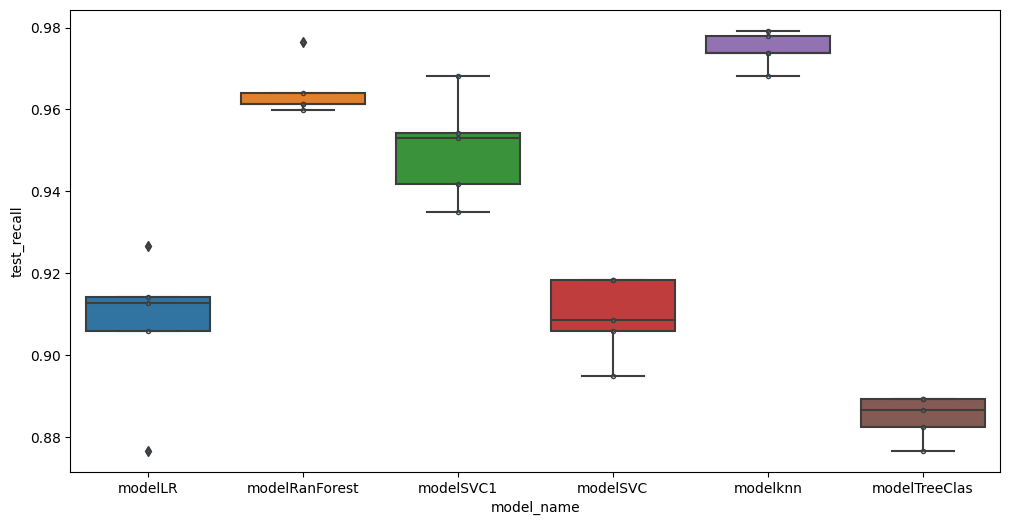

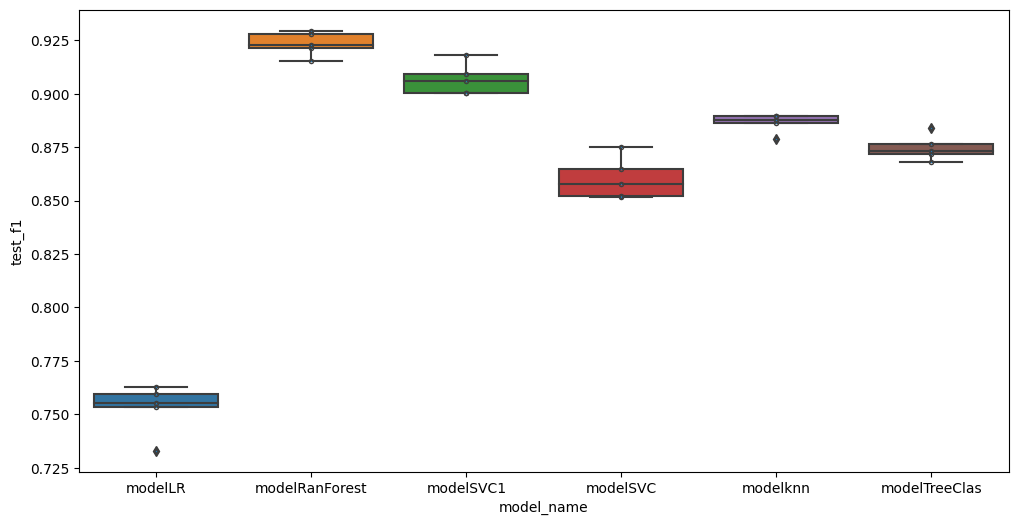

In [ ]:
# Gráfica de las métricas de los modelos

for j in cv_df.columns[1:]:

    fig = plt.figure(figsize=(12,6))

    sns.boxplot(x='model_name', y=j, data=cv_df)
    sns.stripplot(x='model_name', y=j, data=cv_df,
                  size=1, jitter=False, edgecolor="gray", linewidth=3)
    plt.show()

In [ ]:
#La media de cada métrica por modelo
for j in cv_df.columns[1:]:
    print(f"\n{j} \n")
    print(cv_df.groupby('model_name')[j].mean().sort_values(ascending=False))


test_recall 

model_name
modelknn         0.9745
modelRanForest   0.9646
modelSVC1        0.9505
modelSVC         0.9092
modelLR          0.9073
modelTreeClas    0.8849
Name: test_recall, dtype: float64

test_f1 

model_name
modelRanForest   0.9233
modelSVC1        0.9067
modelknn         0.8864
modelTreeClas    0.8746
modelSVC         0.8602
modelLR          0.7527
Name: test_f1, dtype: float64
